# Car Evaluation

*Supervised Learning*

CS7641 - Machine Learning

Kamolphan Liwprasert (kliwprasert3@gatech.edu)

GTID: 903457032


# Dataset Information
https://archive.ics.uci.edu/ml/datasets/car+evaluation

1. Title: Car Evaluation Database

2. Sources:
   (a) Creator: Marko Bohanec
   (b) Donors: Marko Bohanec   (marko.bohanec@ijs.si)
               Blaz Zupan      (blaz.zupan@ijs.si)
   (c) Date: June, 1997

3. Past Usage:

   The hierarchical decision model, from which this dataset is
   derived, was first presented in 

   M. Bohanec and V. Rajkovic: Knowledge acquisition and explanation for
   multi-attribute decision making. In 8th Intl Workshop on Expert
   Systems and their Applications, Avignon, France. pages 59-78, 1988.

   Within machine-learning, this dataset was used for the evaluation
   of HINT (Hierarchy INduction Tool), which was proved to be able to
   completely reconstruct the original hierarchical model. This,
   together with a comparison with C4.5, is presented in

   B. Zupan, M. Bohanec, I. Bratko, J. Demsar: Machine learning by
   function decomposition. ICML-97, Nashville, TN. 1997 (to appear)

4. Relevant Information Paragraph:

   Car Evaluation Database was derived from a simple hierarchical
   decision model originally developed for the demonstration of DEX
   (M. Bohanec, V. Rajkovic: Expert system for decision
   making. Sistemica 1(1), pp. 145-157, 1990.). The model evaluates
   cars according to the following concept structure:
```
   CAR                      car acceptability
   . PRICE                  overall price
   . . buying               buying price
   . . maint                price of the maintenance
   . TECH                   technical characteristics
   . . COMFORT              comfort
   . . . doors              number of doors
   . . . persons            capacity in terms of persons to carry
   . . . lug_boot           the size of luggage boot
   . . safety               estimated safety of the car
```
   Input attributes are printed in lowercase. Besides the target
   concept (CAR), the model includes three intermediate concepts:
   PRICE, TECH, COMFORT. Every concept is in the original model
   related to its lower level descendants by a set of examples (for
   these examples sets see http://www-ai.ijs.si/BlazZupan/car.html).

   The Car Evaluation Database contains examples with the structural
   information removed, i.e., directly relates CAR to the six input
   attributes: buying, maint, doors, persons, lug_boot, safety.

   Because of known underlying concept structure, this database may be
   particularly useful for testing constructive induction and
   structure discovery methods.

5. Number of Instances: 1728
   (instances completely cover the attribute space)

6. Number of Attributes: 6

7. Attribute Values:
```
   buying       v-high, high, med, low
   maint        v-high, high, med, low
   doors        2, 3, 4, 5-more
   persons      2, 4, more
   lug_boot     small, med, big
   safety       low, med, high
```
8. Missing Attribute Values: none

9. Class Distribution (number of instances per class)
```
   class      N          N[%]
   -----------------------------
   unacc     1210     (70.023 %) 
   acc        384     (22.222 %) 
   good        69     ( 3.993 %) 
   v-good      65     ( 3.762 %) 
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Plot customization
plt.rcParams['axes.grid'] = True
plt.style.use('seaborn-colorblind')

In [2]:
data = pd.read_csv('car.data', header=None)
data.columns = ['buying', 'maint','doors', 'persons','lug_boot', 'safety','class']

print("Dataset Shape: ", data.shape)
data.head()

Dataset Shape:  (1728, 7)


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# EDA

In [3]:
# Plots directory
import os

if not os.path.exists('car_plots'):
    os.makedirs('car_plots')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
data.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,low,low,4,4,small,low,unacc
freq,432,432,432,576,576,576,1210


In [6]:
data.isnull().any()
# no data to impute 

buying      False
maint       False
doors       False
persons     False
lug_boot    False
safety      False
class       False
dtype: bool

In [7]:
data['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

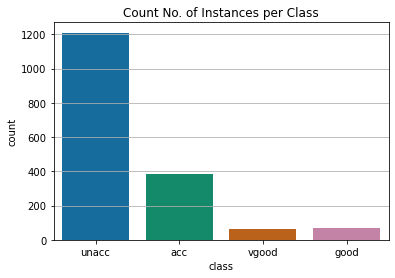

In [8]:
ax = sns.countplot(data['class'])
ax.set_title('Count No. of Instances per Class')
plt.savefig('car_plots/count_class.png')

class   acc  good  unacc  vgood
buying                         
high    108     0    324      0
low      89    46    258     39
med     115    23    268     26
vhigh    72     0    360      0


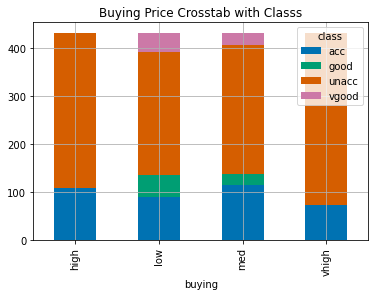

In [9]:
ct = pd.crosstab(data['buying'], data['class'])
print(ct)
ax = ct.plot.bar(stacked=True)
ax.set_title('Buying Price Crosstab with Classs')
plt.savefig('car_plots/crosstab_buying.png')

class  acc  good  unacc  vgood
maint                         
high   105     0    314     13
low     92    46    268     26
med    115    23    268     26
vhigh   72     0    360      0


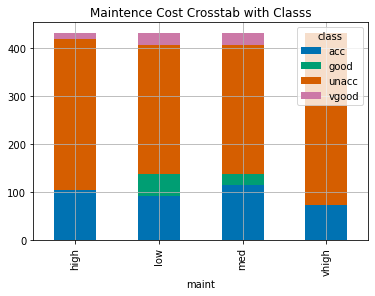

In [10]:
ct = pd.crosstab(data['maint'], data['class'])
print(ct)
ax = ct.plot.bar(stacked=True)
ax.set_title('Maintence Cost Crosstab with Classs')
plt.savefig('car_plots/crosstab_maint.png')

class  acc  good  unacc  vgood
doors                         
2       81    15    326     10
3       99    18    300     15
4      102    18    292     20
5more  102    18    292     20


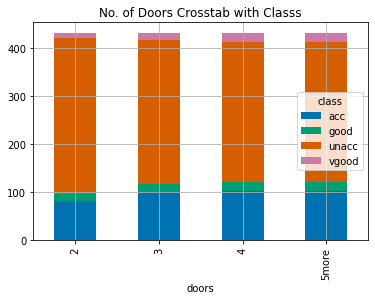

In [11]:
ct = pd.crosstab(data['doors'], data['class'])
print(ct)
ax = ct.plot.bar(stacked=True)
ax.set_title('No. of Doors Crosstab with Classs')
plt.savefig('car_plots/crosstab_door.png')

class    acc  good  unacc  vgood
persons                         
2          0     0    576      0
4        198    36    312     30
more     186    33    322     35


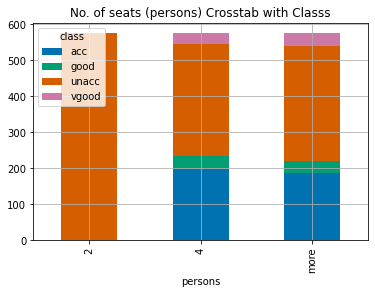

In [12]:
ct = pd.crosstab(data['persons'], data['class'])
print(ct)
ax = ct.plot.bar(stacked=True)
ax.set_title('No. of seats (persons) Crosstab with Classs')
plt.savefig('car_plots/crosstab_persons.png')

class     acc  good  unacc  vgood
lug_boot                         
big       144    24    368     40
med       135    24    392     25
small     105    21    450      0


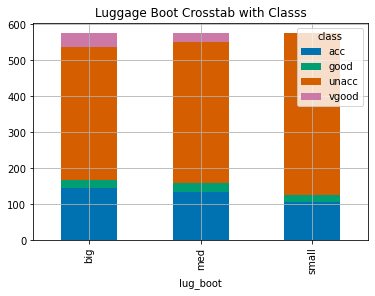

In [13]:
ct = pd.crosstab(data['lug_boot'], data['class'])
print(ct)
ax = ct.plot.bar(stacked=True)
ax.set_title('Luggage Boot Crosstab with Classs')
plt.savefig('car_plots/crosstab_lug_boot.png')

class   acc  good  unacc  vgood
safety                         
high    204    30    277     65
low       0     0    576      0
med     180    39    357      0


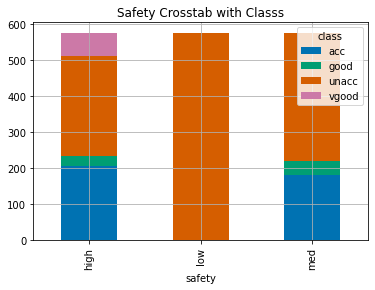

In [14]:
ct = pd.crosstab(data['safety'], data['class'])
print(ct)
ax = ct.plot.bar(stacked=True)
ax.set_title('Safety Crosstab with Classs')
plt.savefig('car_plots/crosstab_safety.png')

# Label Encoding
Original Dataset
```
   buying       vhigh, high, med, low
   maint        vhigh, high, med, low
   doors        2, 3, 4, 5more
   persons      2, 4, more
   lug_boot     small, med, big
   safety       low, med, high
   
   class        unacc, acc, good, vgood
```

Encoded Dataset
```
   buying       4, 3, 2, 1
   maint        4, 3, 2, 1
   doors        2, 3, 4, 5
   persons      2, 4, 6
   lug_boot     1, 2, 3
   safety       1, 2, 3
   
   class        0, 1, 2, 3
```
Note: There is no dash symbol in original dataset, only appears in dataset description.

In [15]:
def label_encoding(car_dataset):
    encoded = car_dataset.replace('vhigh', 4).replace('high', 3).replace('med', 2).replace('low', 1)\
    .replace('5more', 5).replace('more', 6).replace('small', 1).replace('big', 3).replace('unacc', 0)\
    .replace('acc', 1).replace('good', 2).replace('vgood', 3)
    return encoded

In [16]:
data = label_encoding(data)
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,4,4,2,2,1,1,0
1,4,4,2,2,1,2,0
2,4,4,2,2,1,3,0
3,4,4,2,2,2,1,0
4,4,4,2,2,2,2,0


# Train-Test Splitting & Cross Validation

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42, stratify=y)

### Cross Validation

Stratified K-Folds cross-validator : "The folds are made by preserving the percentage of samples for each class."
Note: Stratified K-Folds is the default CV option when it is a classification problem.

In [19]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

### Initialize Score Reporting

In [20]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [21]:
result = {
    'Decision_Tree': {}, 
    'Neural_Network': {},
    'Boosting': {},
    'SVM': {},
    'k-NN': {}
}

# 1 Decision Trees

with some form of pruning and describe split attributes

max_depth =  1
F1 Score:  0.5757146789351578
Training Accuracy:  0.7005789909015715
Testing Accuracy:  0.6994219653179191
Confusion Matrix
[[363   0   0   0]
 [115   0   0   0]
 [ 21   0   0   0]
 [ 20   0   0   0]]
Classification Report
              precision    recall  f1-score   support

           0       0.70      1.00      0.82       363
           1       0.00      0.00      0.00       115
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        20

    accuracy                           0.70       519
   macro avg       0.17      0.25      0.21       519
weighted avg       0.49      0.70      0.58       519

Cross Validation Score
[0.57571468 0.57571468 0.57571468 0.57571468 0.57571468 0.57571468
 0.57571468 0.57571468 0.58103818 0.58103818]


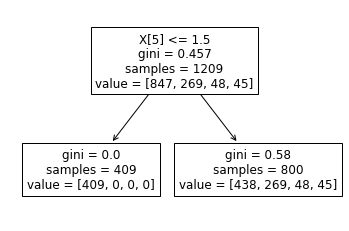

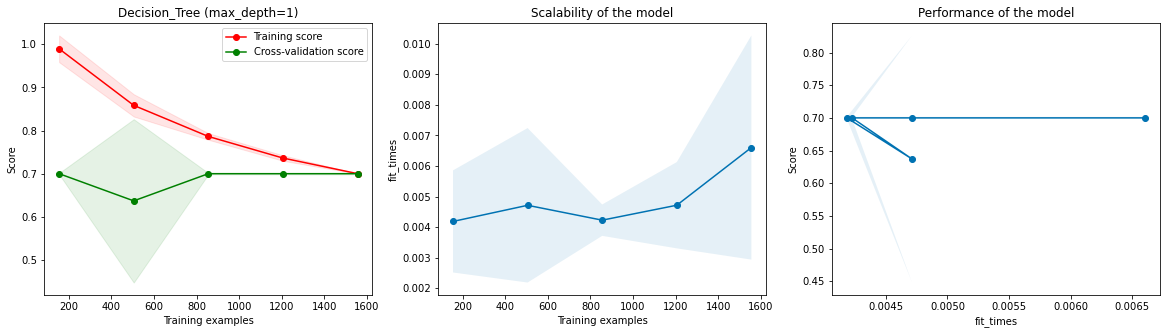

--------------------------------------------------
max_depth =  2
F1 Score:  0.753103262890176
Training Accuracy:  0.7849462365591398
Testing Accuracy:  0.7610789980732178
Confusion Matrix
[[280  83   0   0]
 [  0 115   0   0]
 [  0  21   0   0]
 [  0  20   0   0]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.77      0.87       363
           1       0.48      1.00      0.65       115
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        20

    accuracy                           0.76       519
   macro avg       0.37      0.44      0.38       519
weighted avg       0.81      0.76      0.75       519

Cross Validation Score
[0.64198874 0.636495   0.79968282 0.636495   0.79298263 0.77853014
 0.79778917 0.86038877 0.8378959  0.87221017]


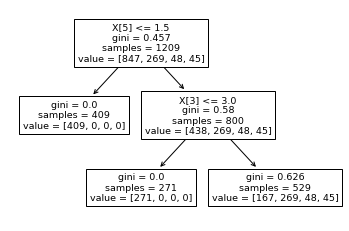

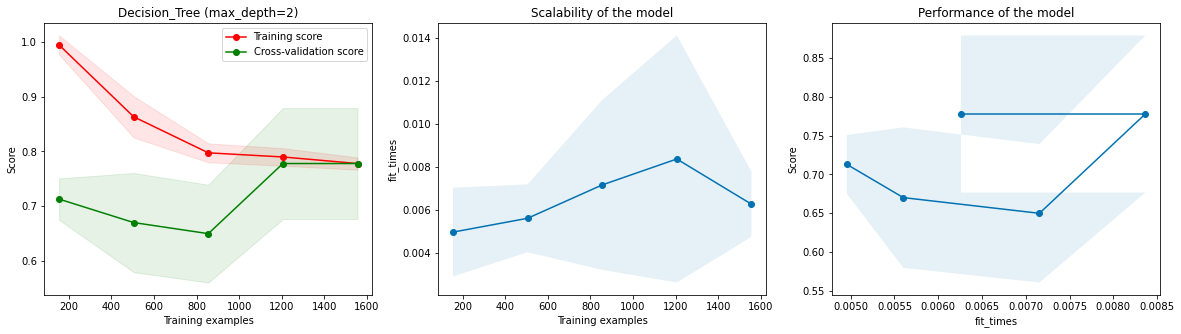

--------------------------------------------------
max_depth =  3
F1 Score:  0.7423359263910274
Training Accuracy:  0.7973531844499586
Testing Accuracy:  0.7784200385356455
Confusion Matrix
[[347  16   0   0]
 [ 58  57   0   0]
 [  0  21   0   0]
 [  0  20   0   0]]
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.96      0.90       363
           1       0.50      0.50      0.50       115
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        20

    accuracy                           0.78       519
   macro avg       0.34      0.36      0.35       519
weighted avg       0.71      0.78      0.74       519

Cross Validation Score
[0.60234917 0.636495   0.60234917 0.636495   0.72950242 0.54826484
 0.79778917 0.86038877 0.8378959  0.87221017]


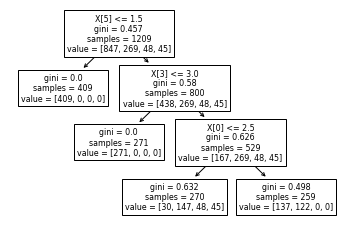

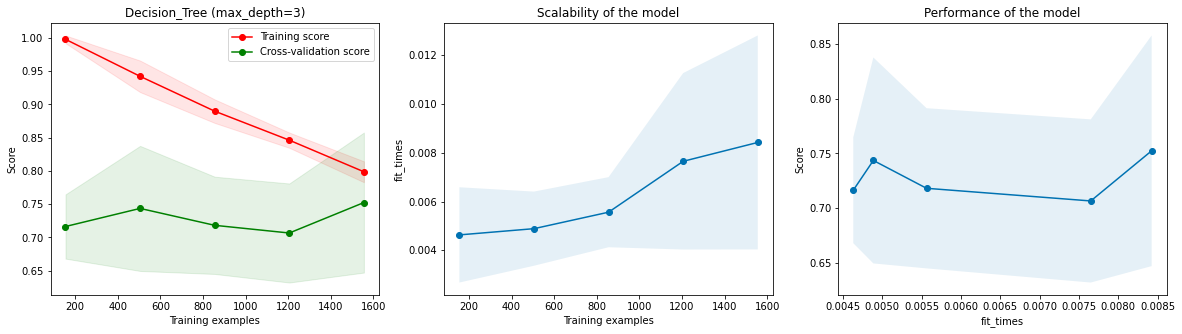

--------------------------------------------------
max_depth =  4
F1 Score:  0.8294921177522591
Training Accuracy:  0.8403639371381307
Testing Accuracy:  0.8285163776493256
Confusion Matrix
[[310  52   1   0]
 [  0  99  16   0]
 [  0   0  21   0]
 [  0   4  16   0]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.85      0.92       363
           1       0.64      0.86      0.73       115
           2       0.39      1.00      0.56        21
           3       0.00      0.00      0.00        20

    accuracy                           0.83       519
   macro avg       0.51      0.68      0.55       519
weighted avg       0.86      0.83      0.83       519

Cross Validation Score
[0.8926507  0.636495   0.61468334 0.636495   0.79298263 0.77853014
 0.77452863 0.80222671 0.8378959  0.84664088]


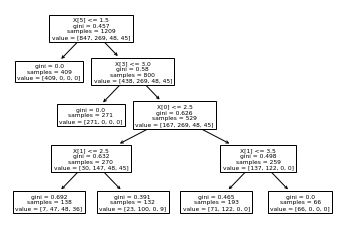

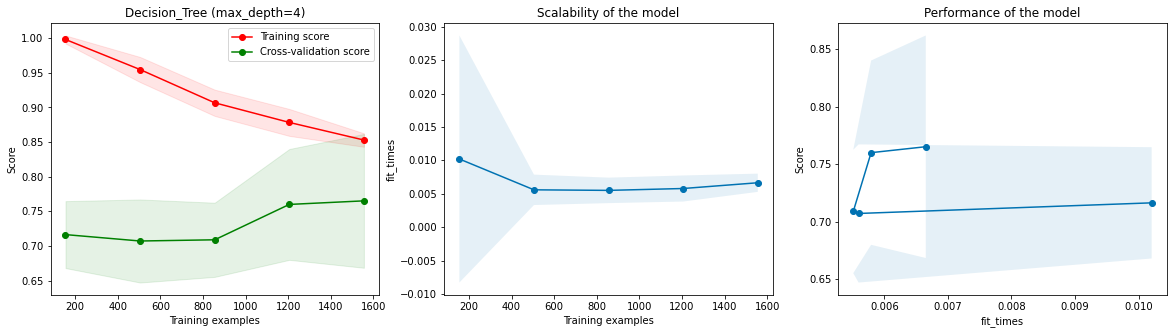

--------------------------------------------------
max_depth =  5
F1 Score:  0.8579567712162427
Training Accuracy:  0.8742762613730356
Testing Accuracy:  0.8689788053949904
Confusion Matrix
[[330  32   0   1]
 [  8 105   0   2]
 [  0  11   0  10]
 [  0   4   0  16]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       363
           1       0.69      0.91      0.79       115
           2       0.00      0.00      0.00        21
           3       0.55      0.80      0.65        20

    accuracy                           0.87       519
   macro avg       0.55      0.66      0.60       519
weighted avg       0.86      0.87      0.86       519

Cross Validation Score
[0.89564525 0.68520395 0.64885862 0.636495   0.85931638 0.78124015
 0.81713146 0.82264117 0.89011255 0.79935882]


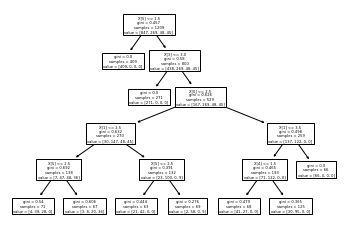

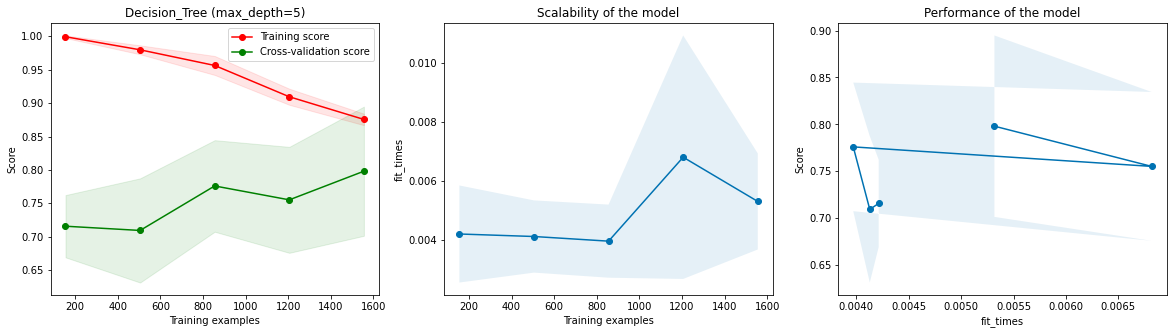

--------------------------------------------------
max_depth =  6
F1 Score:  0.898909060755405
Training Accuracy:  0.9172870140612076
Testing Accuracy:  0.9017341040462428
Confusion Matrix
[[352  10   1   0]
 [ 22  89   2   2]
 [  0   7  11   3]
 [  0   4   0  16]]
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       363
           1       0.81      0.77      0.79       115
           2       0.79      0.52      0.63        21
           3       0.76      0.80      0.78        20

    accuracy                           0.90       519
   macro avg       0.82      0.77      0.79       519
weighted avg       0.90      0.90      0.90       519

Cross Validation Score
[0.98202838 0.68475249 0.75944428 0.68472639 0.87295805 0.89941914
 0.88467303 0.90087979 0.95948216 0.84907259]


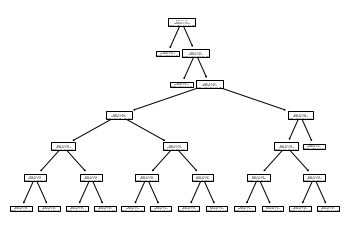

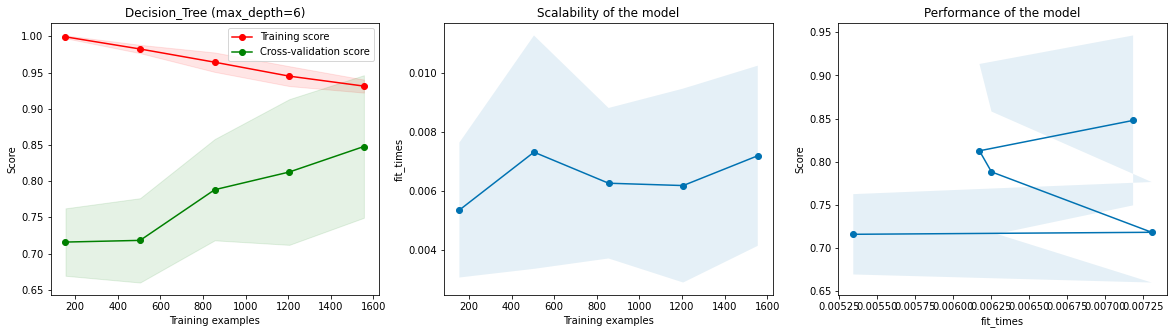

--------------------------------------------------
max_depth =  7
F1 Score:  0.9159115390616862
Training Accuracy:  0.9379652605459057
Testing Accuracy:  0.9190751445086706
Confusion Matrix
[[346  16   1   0]
 [  5 108   0   2]
 [  0  11   7   3]
 [  0   4   0  16]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       363
           1       0.78      0.94      0.85       115
           2       0.88      0.33      0.48        21
           3       0.76      0.80      0.78        20

    accuracy                           0.92       519
   macro avg       0.85      0.76      0.77       519
weighted avg       0.93      0.92      0.92       519

Cross Validation Score
[0.92996067 0.69522298 0.70405938 0.77878546 0.83721863 0.84502874
 0.82384385 0.89364665 0.87525233 0.75633587]


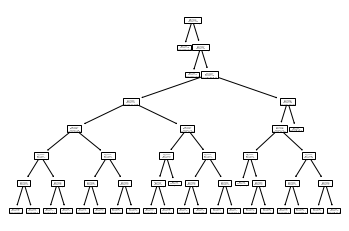

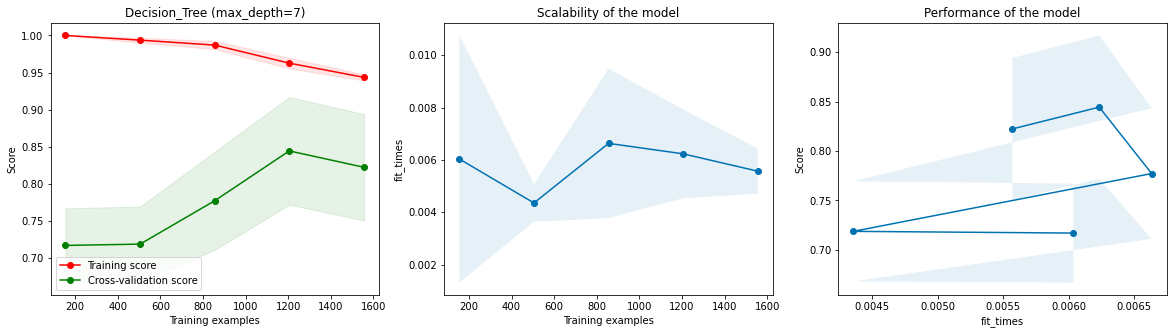

--------------------------------------------------
max_depth =  8
F1 Score:  0.9456299615419846
Training Accuracy:  0.9685690653432589
Testing Accuracy:  0.9460500963391136
Confusion Matrix
[[355   7   1   0]
 [ 13  97   4   1]
 [  0   0  19   2]
 [  0   0   0  20]]
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       363
           1       0.93      0.84      0.89       115
           2       0.79      0.90      0.84        21
           3       0.87      1.00      0.93        20

    accuracy                           0.95       519
   macro avg       0.89      0.93      0.91       519
weighted avg       0.95      0.95      0.95       519

Cross Validation Score
[0.9883436  0.73419534 0.77651884 0.71640566 0.89027302 0.84592403
 0.9097556  0.92420416 0.9257673  0.88356922]


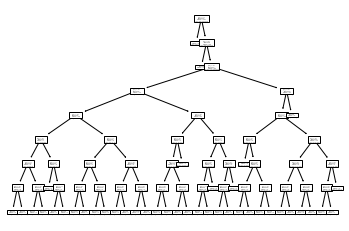

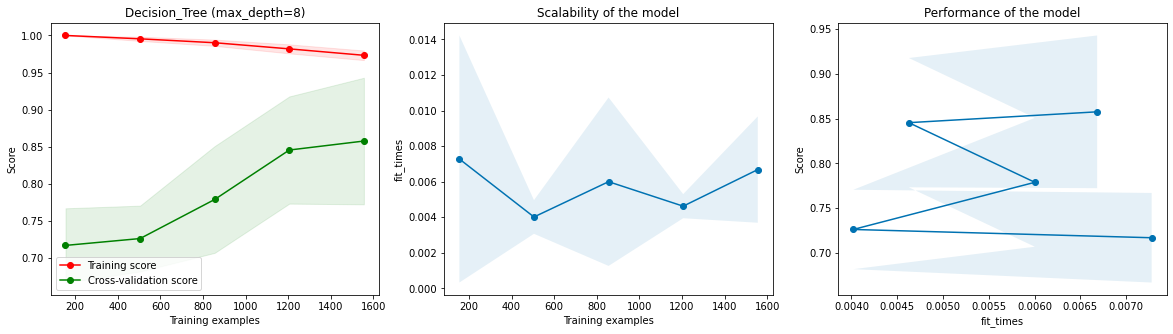

--------------------------------------------------
max_depth =  9
F1 Score:  0.9458334608372352
Training Accuracy:  0.9867659222497932
Testing Accuracy:  0.9479768786127167
Confusion Matrix
[[359   4   0   0]
 [ 11 103   0   1]
 [  2   5  12   2]
 [  0   2   0  18]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       363
           1       0.90      0.90      0.90       115
           2       1.00      0.57      0.73        21
           3       0.86      0.90      0.88        20

    accuracy                           0.95       519
   macro avg       0.93      0.84      0.87       519
weighted avg       0.95      0.95      0.95       519

Cross Validation Score
[0.94175483 0.79125939 0.7665428  0.79705795 0.86618011 0.83871268
 0.91859024 0.90111189 0.91872871 0.88356922]


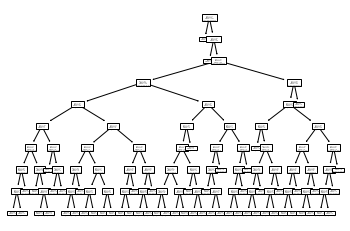

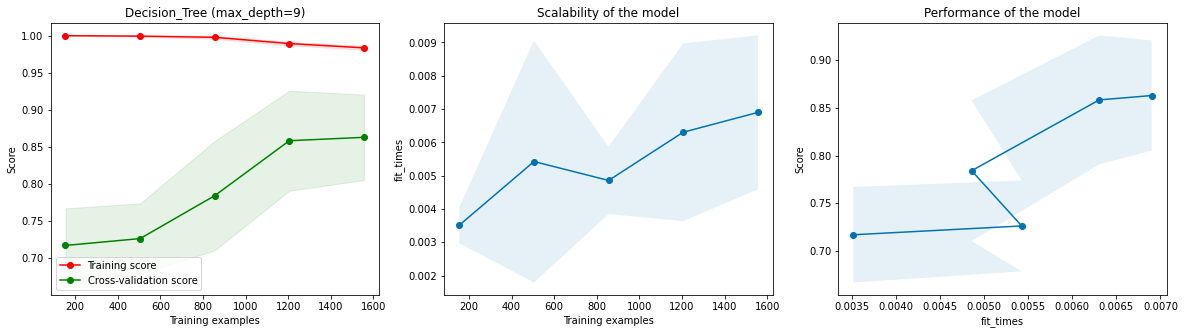

--------------------------------------------------
max_depth =  10
F1 Score:  0.9542970270089404
Training Accuracy:  0.9950372208436724
Testing Accuracy:  0.9556840077071291
Confusion Matrix
[[361   2   0   0]
 [ 14 100   1   0]
 [  1   5  15   0]
 [  0   0   0  20]]
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       363
           1       0.93      0.87      0.90       115
           2       0.94      0.71      0.81        21
           3       1.00      1.00      1.00        20

    accuracy                           0.96       519
   macro avg       0.96      0.89      0.92       519
weighted avg       0.96      0.96      0.95       519

Cross Validation Score
[0.94851634 0.79174736 0.78588385 0.77596406 0.89837757 0.88712072
 0.92335909 0.93312149 0.91872871 0.88356922]


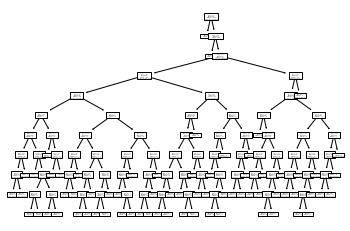

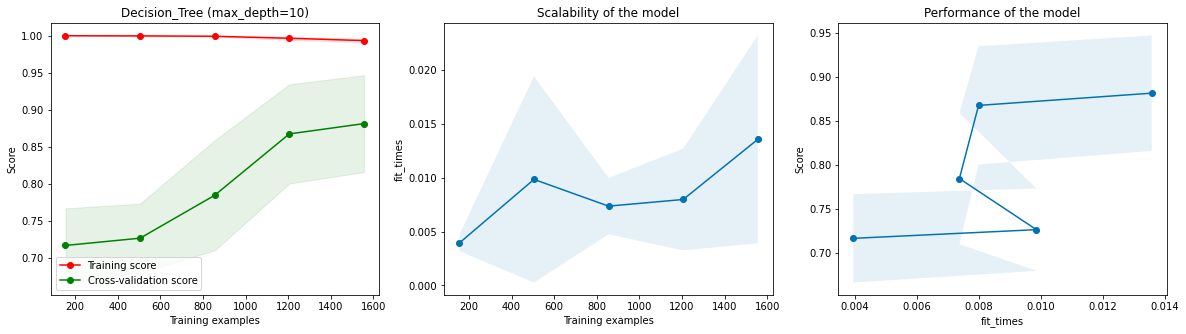

--------------------------------------------------
max_depth =  11
F1 Score:  0.9628862134745703
Training Accuracy:  0.9991728701406121
Testing Accuracy:  0.9633911368015414
Confusion Matrix
[[360   3   0   0]
 [ 11 103   1   0]
 [  1   2  18   0]
 [  0   1   0  19]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       363
           1       0.94      0.90      0.92       115
           2       0.95      0.86      0.90        21
           3       1.00      0.95      0.97        20

    accuracy                           0.96       519
   macro avg       0.97      0.92      0.94       519
weighted avg       0.96      0.96      0.96       519

Cross Validation Score
[0.94851634 0.80743822 0.7867815  0.80068052 0.90349272 0.86228479
 0.92335909 0.93312149 0.96000506 0.88356922]


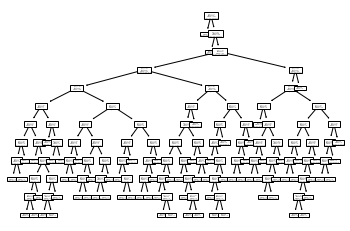

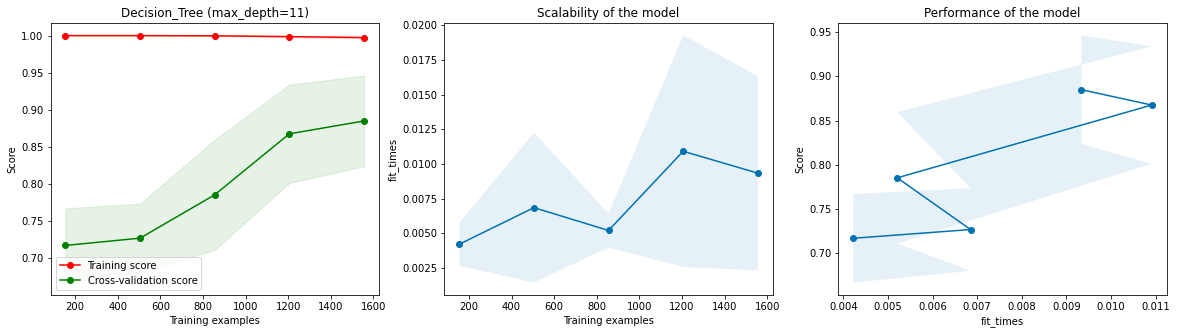

--------------------------------------------------
max_depth =  12
F1 Score:  0.9687589747897507
Training Accuracy:  1.0
Testing Accuracy:  0.9691714836223507
Confusion Matrix
[[361   2   0   0]
 [  9 105   1   0]
 [  1   2  18   0]
 [  0   1   0  19]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       363
           1       0.95      0.91      0.93       115
           2       0.95      0.86      0.90        21
           3       1.00      0.95      0.97        20

    accuracy                           0.97       519
   macro avg       0.97      0.93      0.95       519
weighted avg       0.97      0.97      0.97       519

Cross Validation Score
[0.94851634 0.80294405 0.79173427 0.79009843 0.90349272 0.88093028
 0.92335909 0.93312149 0.96000506 0.88356922]


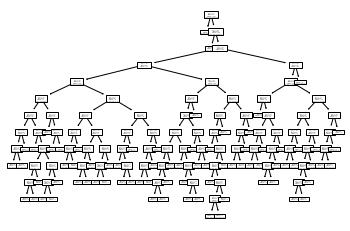

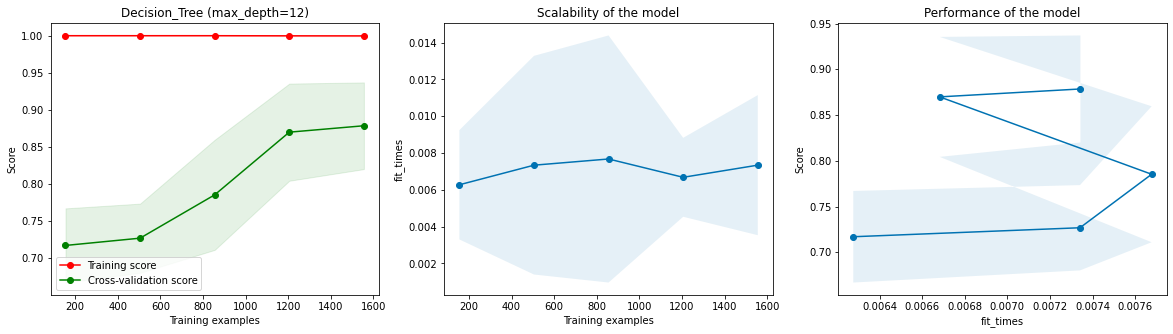

--------------------------------------------------


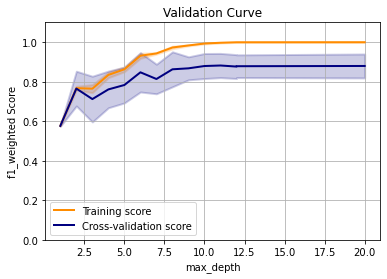

CPU times: user 48.7 s, sys: 7.61 s, total: 56.3 s
Wall time: 1min 6s


In [34]:
%%time
task = "Decision_Tree"
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

f1 = []
train_acc = []
test_acc = []
params = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
for k in params:
    print("max_depth = ", k)
    clf = DecisionTreeClassifier(max_depth = k)
    fit_tree = clf.fit(x_train, y_train)
    
    # See the tree
    tree.plot_tree(fit_tree) 
    plt.savefig(f'car_plots/learning_curve_{task}_tree_{k}.png')
    
    y_pred = clf.predict(x_test)
    result[task][k] = {
        "f1" : f1_score(y_test,y_pred, average='weighted'),
        "training_acc": clf.score(x_train, y_train),
        "testing_acc": clf.score(x_test, y_test),
        "confusion_mat": confusion_matrix(y_test, y_pred),
        "classification_report": classification_report(y_test,y_pred),
        "cross_validation_score": cross_val_score(clf, x, y, cv=10, scoring='f1_weighted'),
        "tree_rules": tree.export_text(clf, feature_names=list(x_train))
    }
    print("F1 Score: ", result[task][k]["f1"])
    print("Training Accuracy: ", result[task][k]["training_acc"])
    print("Testing Accuracy: ", result[task][k]["testing_acc"])
    print("Confusion Matrix")
    print(result[task][k]["confusion_mat"])
    print("Classification Report")
    print(result[task][k]["classification_report"])
    print("Cross Validation Score")
    print(result[task][k]["cross_validation_score"])
    
    # Add to lists
    f1.append(result[task][k]["f1"])
    train_acc.append(result[task][k]["training_acc"])
    test_acc.append(result[task][k]["testing_acc"])
    
    # Learning Curve
    plot_learning_curve(clf, f"{task} (max_depth={k})", x, y, axes=None, cv=10, n_jobs=4)
    plt.savefig(f'car_plots/learning_curve_{task}_{k}.png')
    plt.show()
    
    print("--------------------------------------------------")
    
# Validation Curve
new_params = params + [12, 20]
plot_validation_curve(DecisionTreeClassifier(), f"{task}: max_depth", x, y, "max_depth", new_params, scoring="f1_weighted", axes=None, cv=10, n_jobs=4)
plt.savefig(f'car_plots/validation_curve_{task}.png')
plt.show()

# 2 Neural Networks

hidden_layer_sizes =  3 , activation =  relu
F1 Score:  0.6582424574230981
Training Accuracy:  0.7411083540115798
Testing Accuracy:  0.7148362235067437
Confusion Matrix
[[345  18   0   0]
 [ 89  26   0   0]
 [  8  13   0   0]
 [  3  17   0   0]]
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.95      0.85       363
           1       0.35      0.23      0.28       115
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        20

    accuracy                           0.71       519
   macro avg       0.28      0.29      0.28       519
weighted avg       0.62      0.71      0.66       519

Cross Validation Score
[0.72174101 0.7317238  0.75221999 0.76824403 0.78787732 0.74367775
 0.77071951 0.71805499 0.81283668 0.43011494]


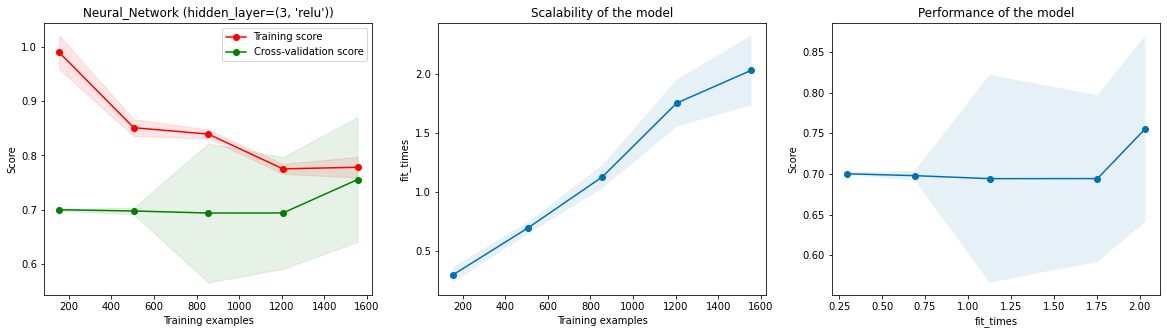

--------------------------------------------------
hidden_layer_sizes =  4 , activation =  relu
F1 Score:  0.5920165843164449
Training Accuracy:  0.7038875103391232
Testing Accuracy:  0.7013487475915221
Confusion Matrix
[[361   2   0   0]
 [113   1   1   0]
 [ 17   2   2   0]
 [ 13   4   3   0]]
Classification Report
              precision    recall  f1-score   support

           0       0.72      0.99      0.83       363
           1       0.11      0.01      0.02       115
           2       0.33      0.10      0.15        21
           3       0.00      0.00      0.00        20

    accuracy                           0.70       519
   macro avg       0.29      0.27      0.25       519
weighted avg       0.54      0.70      0.59       519

Cross Validation Score
[0.59598632 0.5897565  0.60905371 0.63344209 0.68085402 0.61665068
 0.65078205 0.66170862 0.73991225 0.44370555]


<Figure size 432x288 with 0 Axes>

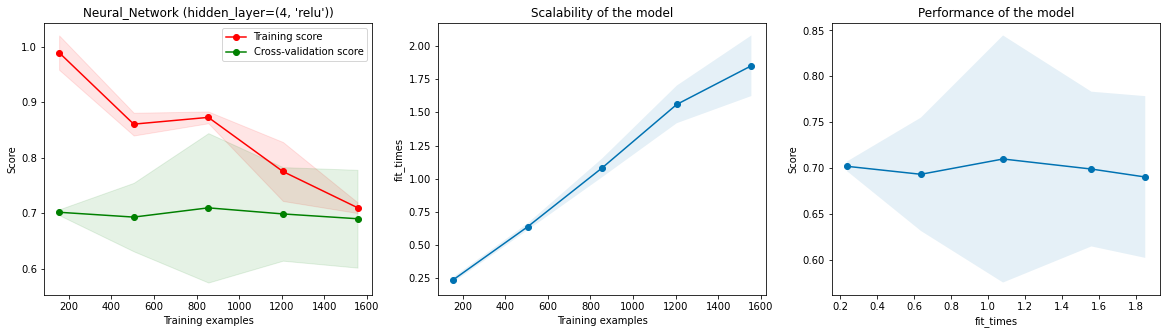

--------------------------------------------------
hidden_layer_sizes =  5 , activation =  relu
F1 Score:  0.8478664100565737
Training Accuracy:  0.8850289495450786
Testing Accuracy:  0.861271676300578
Confusion Matrix
[[353   9   1   0]
 [ 24  88   2   1]
 [  0  14   2   5]
 [  0  10   6   4]]
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       363
           1       0.73      0.77      0.75       115
           2       0.18      0.10      0.12        21
           3       0.40      0.20      0.27        20

    accuracy                           0.86       519
   macro avg       0.56      0.51      0.52       519
weighted avg       0.84      0.86      0.85       519

Cross Validation Score
[0.78466664 0.84119125 0.88648807 0.89986496 0.86880471 0.8454807
 0.93158073 0.92789364 0.93582223 0.75383511]


<Figure size 432x288 with 0 Axes>

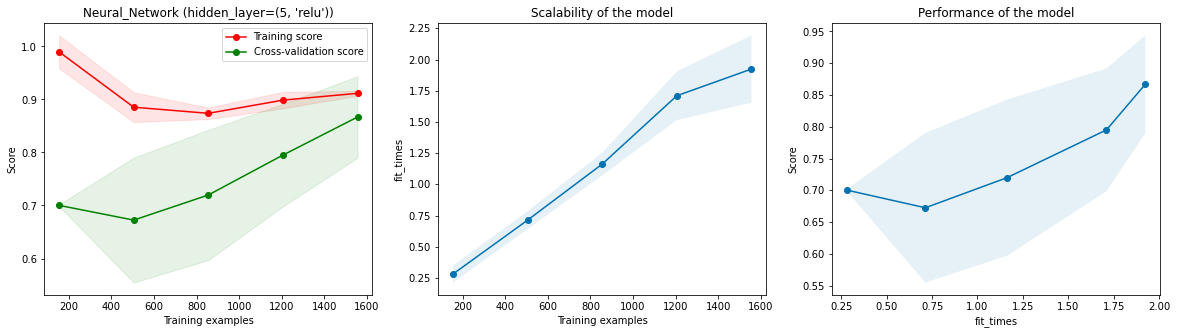

--------------------------------------------------
hidden_layer_sizes =  6 , activation =  relu
F1 Score:  0.8101893158362131
Training Accuracy:  0.8569065343258891
Testing Accuracy:  0.8227360308285164
Confusion Matrix
[[346  12   5   0]
 [ 40  73   2   0]
 [  0  16   4   1]
 [  0  10   6   4]]
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       363
           1       0.66      0.63      0.65       115
           2       0.24      0.19      0.21        21
           3       0.80      0.20      0.32        20

    accuracy                           0.82       519
   macro avg       0.65      0.49      0.53       519
weighted avg       0.81      0.82      0.81       519

Cross Validation Score
[0.77099146 0.83872513 0.89931573 0.83696386 0.85859924 0.83923684
 0.90420022 0.9415203  0.90556518 0.75152648]


<Figure size 432x288 with 0 Axes>

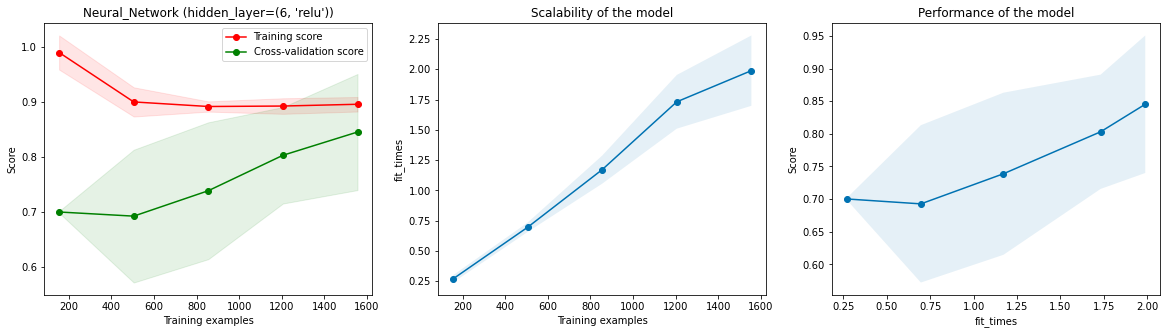

--------------------------------------------------
hidden_layer_sizes =  10 , activation =  relu
F1 Score:  0.8139110906429351
Training Accuracy:  0.8626964433416047
Testing Accuracy:  0.8304431599229287
Confusion Matrix
[[347  15   1   0]
 [ 38  77   0   0]
 [  0  17   3   1]
 [  0  13   3   4]]
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       363
           1       0.63      0.67      0.65       115
           2       0.43      0.14      0.21        21
           3       0.80      0.20      0.32        20

    accuracy                           0.83       519
   macro avg       0.69      0.49      0.53       519
weighted avg       0.82      0.83      0.81       519

Cross Validation Score
[0.77561446 0.79836384 0.84313647 0.81871622 0.86205175 0.76916469
 0.91135862 0.89959076 0.94094662 0.70400368]


<Figure size 432x288 with 0 Axes>

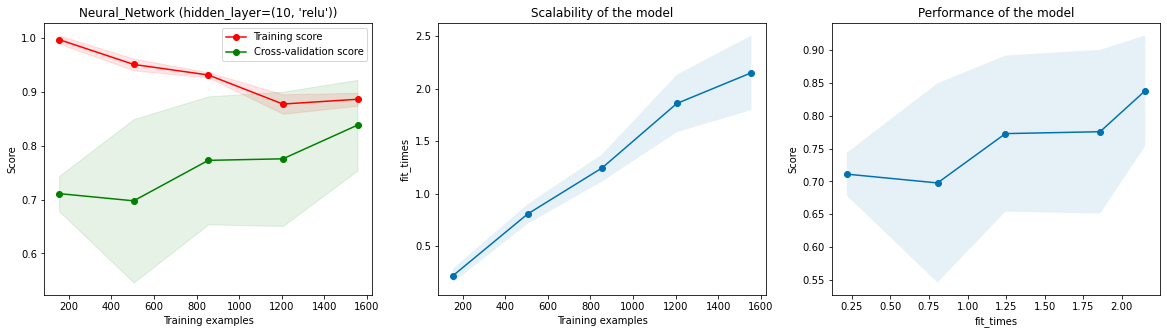

--------------------------------------------------
hidden_layer_sizes =  (2, 4) , activation =  relu
F1 Score:  0.6855602715473272
Training Accuracy:  0.7535153019023987
Testing Accuracy:  0.7186897880539499
Confusion Matrix
[[330  33   0   0]
 [ 72  43   0   0]
 [  0  21   0   0]
 [  0  20   0   0]]
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       363
           1       0.37      0.37      0.37       115
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        20

    accuracy                           0.72       519
   macro avg       0.30      0.32      0.31       519
weighted avg       0.66      0.72      0.69       519

Cross Validation Score
[0.68011603 0.71458908 0.57571468 0.76824403 0.79053508 0.69323519
 0.75044239 0.70872994 0.76126419 0.49829628]


<Figure size 432x288 with 0 Axes>

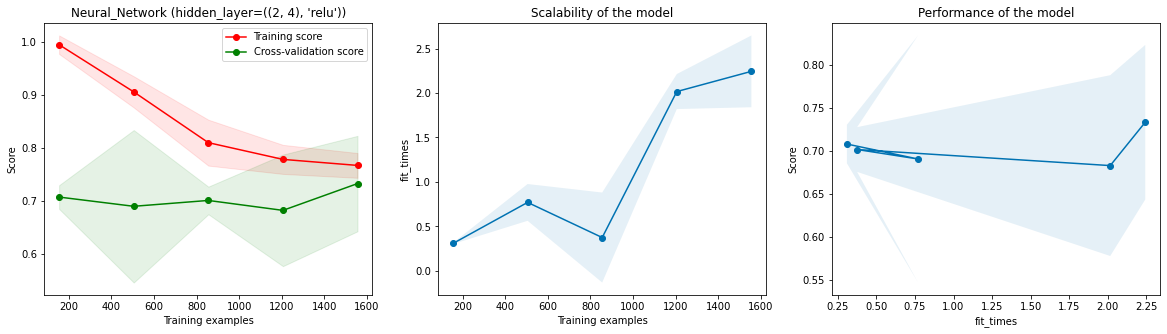

--------------------------------------------------
hidden_layer_sizes =  (3, 3) , activation =  relu
F1 Score:  0.6666804643219091
Training Accuracy:  0.7444168734491315
Testing Accuracy:  0.7032755298651252
Confusion Matrix
[[326  37   0   0]
 [ 76  39   0   0]
 [  6  15   0   0]
 [  3  17   0   0]]
Classification Report
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       363
           1       0.36      0.34      0.35       115
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        20

    accuracy                           0.70       519
   macro avg       0.29      0.31      0.30       519
weighted avg       0.63      0.70      0.67       519

Cross Validation Score
[0.61300734 0.71750105 0.77316801 0.80423801 0.81943405 0.81394684
 0.77772361 0.84122998 0.73208695 0.42454555]


<Figure size 432x288 with 0 Axes>

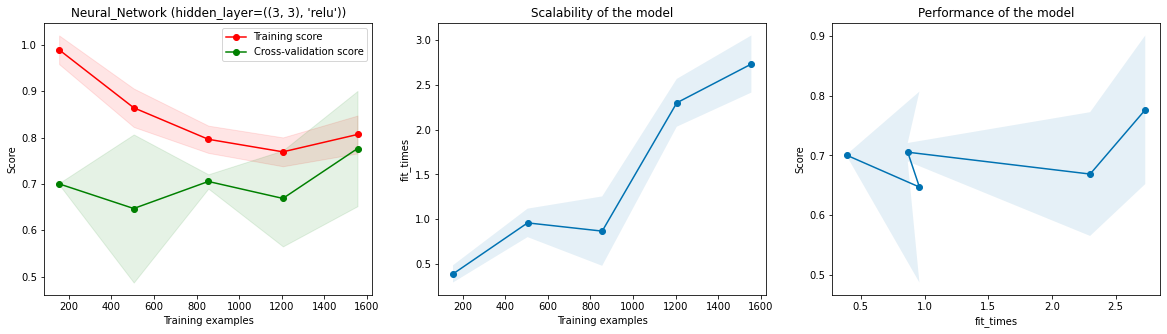

--------------------------------------------------
hidden_layer_sizes =  (4, 2) , activation =  relu
F1 Score:  0.5757146789351578
Training Accuracy:  0.7005789909015715
Testing Accuracy:  0.6994219653179191
Confusion Matrix
[[363   0   0   0]
 [115   0   0   0]
 [ 21   0   0   0]
 [ 20   0   0   0]]
Classification Report
              precision    recall  f1-score   support

           0       0.70      1.00      0.82       363
           1       0.00      0.00      0.00       115
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        20

    accuracy                           0.70       519
   macro avg       0.17      0.25      0.21       519
weighted avg       0.49      0.70      0.58       519

Cross Validation Score
[0.57571468 0.57571468 0.57571468 0.57571468 0.57571468 0.57571468
 0.57571468 0.57571468 0.58103818 0.58103818]


<Figure size 432x288 with 0 Axes>

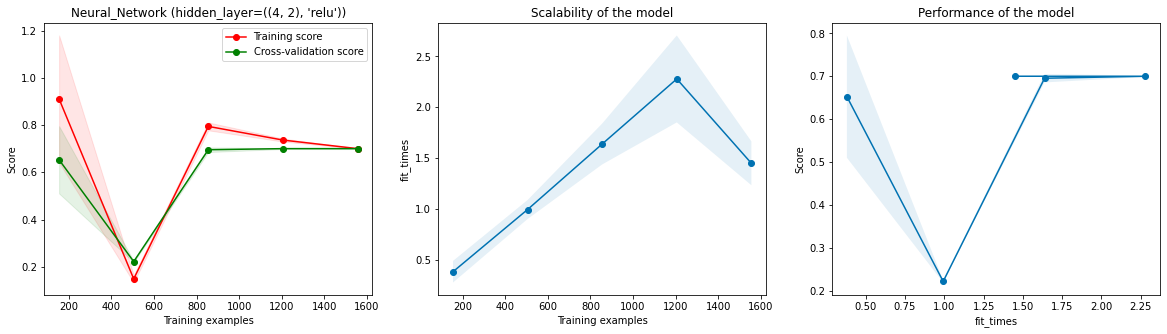

--------------------------------------------------
hidden_layer_sizes =  (5, 5) , activation =  relu
F1 Score:  0.8497763470818869
Training Accuracy:  0.8784119106699751
Testing Accuracy:  0.8651252408477842
Confusion Matrix
[[344  19   0   0]
 [ 20  95   0   0]
 [  0  10   0  11]
 [  0  10   0  10]]
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       363
           1       0.71      0.83      0.76       115
           2       0.00      0.00      0.00        21
           3       0.48      0.50      0.49        20

    accuracy                           0.87       519
   macro avg       0.53      0.57      0.55       519
weighted avg       0.84      0.87      0.85       519

Cross Validation Score
[0.80246702 0.8020005  0.9080553  0.8662881  0.89610554 0.84100365
 0.91317864 0.90025799 0.90116919 0.75111749]


<Figure size 432x288 with 0 Axes>

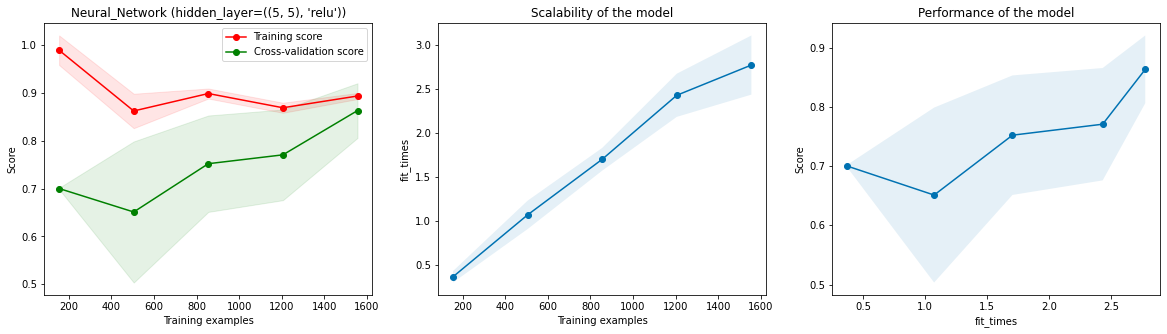

--------------------------------------------------
hidden_layer_sizes =  (10, 10) , activation =  relu
F1 Score:  0.8908489236423555
Training Accuracy:  0.9048800661703887
Testing Accuracy:  0.8978805394990366
Confusion Matrix
[[348  13   2   0]
 [ 11 103   1   0]
 [  0   9   4   8]
 [  0   9   0  11]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       363
           1       0.77      0.90      0.83       115
           2       0.57      0.19      0.29        21
           3       0.58      0.55      0.56        20

    accuracy                           0.90       519
   macro avg       0.72      0.65      0.66       519
weighted avg       0.89      0.90      0.89       519

Cross Validation Score
[0.79638099 0.8739711  0.902427   0.86901681 0.8615588  0.85709212
 0.94526737 0.97663776 0.94316867 0.8096841 ]


<Figure size 432x288 with 0 Axes>

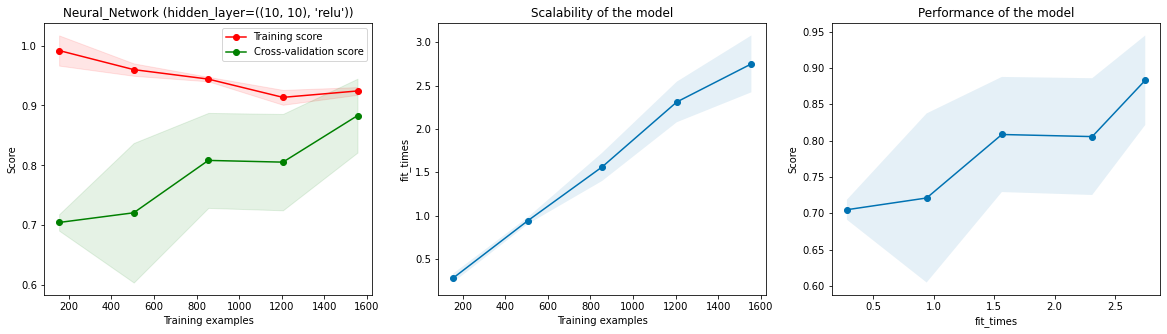

--------------------------------------------------
hidden_layer_sizes =  (5, 5, 5) , activation =  relu
F1 Score:  0.8417245801619645
Training Accuracy:  0.8759305210918115
Testing Accuracy:  0.8574181117533719
Confusion Matrix
[[343  19   0   1]
 [ 27  88   0   0]
 [  0  11   0  10]
 [  0   6   0  14]]
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       363
           1       0.71      0.77      0.74       115
           2       0.00      0.00      0.00        21
           3       0.56      0.70      0.62        20

    accuracy                           0.86       519
   macro avg       0.55      0.60      0.57       519
weighted avg       0.83      0.86      0.84       519

Cross Validation Score
[0.80145618 0.81823432 0.82849344 0.88186784 0.88109856 0.85293282
 0.9016607  0.92157496 0.91117571 0.83772175]


<Figure size 432x288 with 0 Axes>

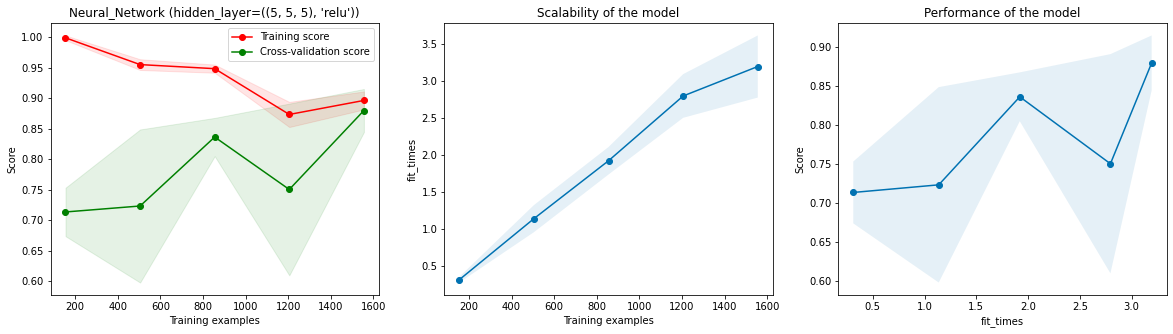

--------------------------------------------------
hidden_layer_sizes =  (5, 5, 5) , activation =  tanh
F1 Score:  0.8557302126120412
Training Accuracy:  0.8990901571546733
Testing Accuracy:  0.8670520231213873
Confusion Matrix
[[347  16   0   0]
 [ 23  89   0   3]
 [  0  14   2   5]
 [  0   7   1  12]]
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       363
           1       0.71      0.77      0.74       115
           2       0.67      0.10      0.17        21
           3       0.60      0.60      0.60        20

    accuracy                           0.87       519
   macro avg       0.73      0.61      0.61       519
weighted avg       0.86      0.87      0.86       519

Cross Validation Score
[0.78516169 0.88130569 0.89391448 0.87322733 0.85351574 0.84061069
 0.93353028 0.9494519  0.92396284 0.83781208]


<Figure size 432x288 with 0 Axes>

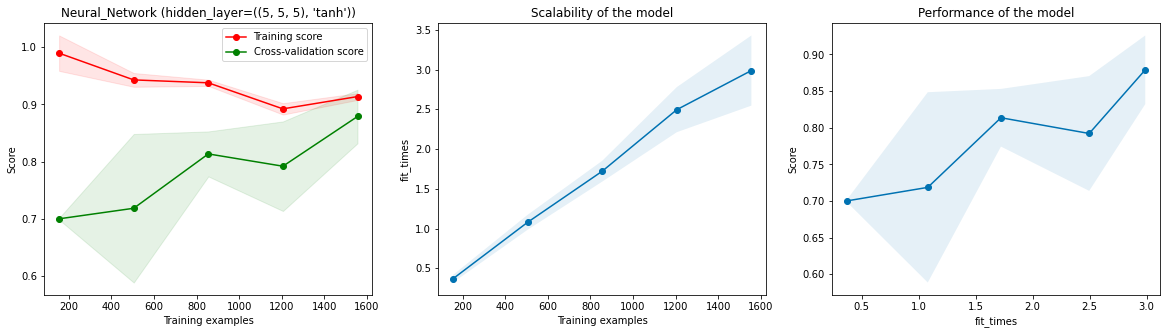

--------------------------------------------------
hidden_layer_sizes =  (6, 6, 6) , activation =  tanh
F1 Score:  0.8341169431659889
Training Accuracy:  0.8817204301075269
Testing Accuracy:  0.8516377649325626
Confusion Matrix
[[346  17   0   0]
 [ 32  81   0   2]
 [  0  17   0   4]
 [  0   5   0  15]]
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       363
           1       0.68      0.70      0.69       115
           2       0.00      0.00      0.00        21
           3       0.71      0.75      0.73        20

    accuracy                           0.85       519
   macro avg       0.58      0.60      0.59       519
weighted avg       0.82      0.85      0.83       519

Cross Validation Score
[0.74933897 0.86030343 0.86877896 0.86954373 0.84407254 0.83902556
 0.90758115 0.92336864 0.90761086 0.77819779]


<Figure size 432x288 with 0 Axes>

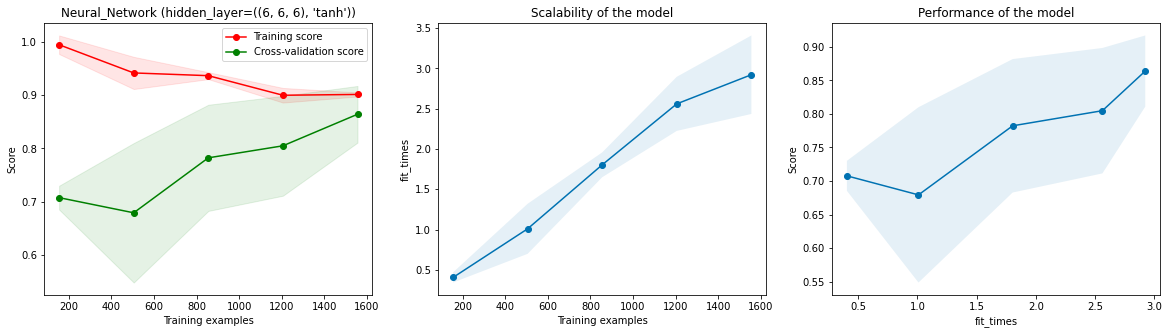

--------------------------------------------------
hidden_layer_sizes =  (10, 10, 10) , activation =  tanh
F1 Score:  0.8913257703627248
Training Accuracy:  0.9172870140612076
Testing Accuracy:  0.8940269749518305
Confusion Matrix
[[351  12   0   0]
 [ 16  94   2   3]
 [  0   6   8   7]
 [  0   5   4  11]]
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       363
           1       0.80      0.82      0.81       115
           2       0.57      0.38      0.46        21
           3       0.52      0.55      0.54        20

    accuracy                           0.89       519
   macro avg       0.71      0.68      0.69       519
weighted avg       0.89      0.89      0.89       519

Cross Validation Score
[0.77569317 0.85286597 0.89409187 0.86917282 0.8712983  0.848119
 0.94771789 0.94152391 0.91698722 0.75540631]


<Figure size 432x288 with 0 Axes>

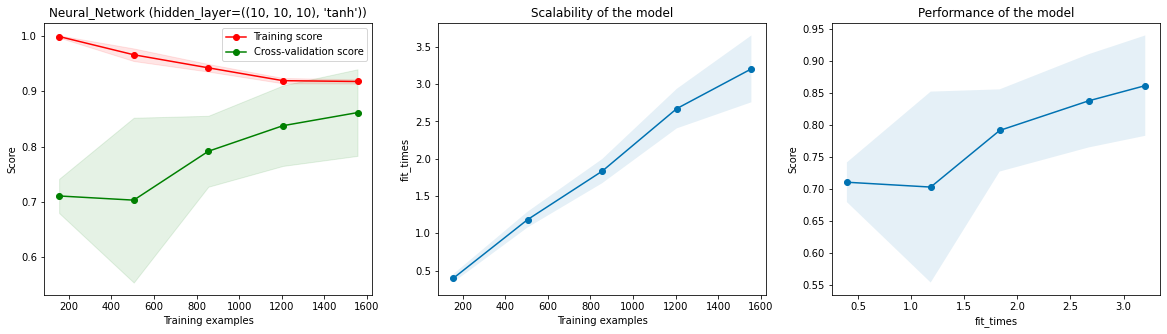

--------------------------------------------------


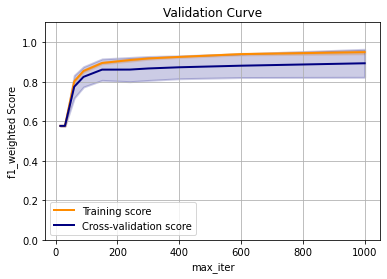

CPU times: user 3min 13s, sys: 2.4 s, total: 3min 15s
Wall time: 9min 23s


In [23]:
%%time
task = "Neural_Network"
# Multi-layer Perceptron Classifier
from sklearn.neural_network import MLPClassifier

f1 = []
train_acc = []
test_acc = []
params = [
    ((3), 'relu'),
    ((4), 'relu'),
    ((5), 'relu'),
    ((6), 'relu'),
    ((10), 'relu'),
    ((2, 4), 'relu'),
    ((3, 3), 'relu'),
    ((4, 2), 'relu'),
    ((5, 5), 'relu'),
    ((10, 10), 'relu'),
    ((5, 5, 5), 'relu'),
    ((5, 5, 5), 'tanh'),
    ((6, 6, 6), 'tanh'),
    ((10, 10, 10), 'tanh'),
]
for k in params:
    print("hidden_layer_sizes = ", k[0], ", activation = ", k[1])
    clf = MLPClassifier(hidden_layer_sizes=k[0], max_iter=300,activation = k[1],solver='adam',random_state=1)
    fit_tree = clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    result[task][k] = {
        "f1" : f1_score(y_test,y_pred, average='weighted'),
        "training_acc": clf.score(x_train, y_train),
        "testing_acc": clf.score(x_test, y_test),
        "confusion_mat": confusion_matrix(y_test, y_pred),
        "classification_report": classification_report(y_test,y_pred),
        "cross_validation_score": cross_val_score(clf, x, y, cv=10, scoring='f1_weighted'),
    }
    print("F1 Score: ", result[task][k]["f1"])
    print("Training Accuracy: ", result[task][k]["training_acc"])
    print("Testing Accuracy: ", result[task][k]["testing_acc"])
    print("Confusion Matrix")
    print(result[task][k]["confusion_mat"])
    print("Classification Report")
    print(result[task][k]["classification_report"])
    print("Cross Validation Score")
    print(result[task][k]["cross_validation_score"])
    
    # Add to lists
    f1.append(result[task][k]["f1"])
    train_acc.append(result[task][k]["training_acc"])
    test_acc.append(result[task][k]["testing_acc"])
    
    # Learning Curve
    plot_learning_curve(clf, f"{task} (hidden_layer={k})", x, y, axes=None, cv=10, n_jobs=4)
    plt.show()
    plt.savefig(f'car_plots/learning_curve_{task}_{k}.png')
    
    print("--------------------------------------------------")
    
# Validation Curve
chosen_size = (10, 10, 10)
chosen_activation = 'tanh'
max_iter_list = [15, 30, 60, 90, 150, 240, 300, 400, 600, 1000]
plot_validation_curve(MLPClassifier(hidden_layer_sizes=k[0], max_iter=300,activation = chosen_activation,solver='adam',random_state=1), 
                      f"{task}: hidden_layer_sizes={chosen_size}, max_iter", x, y, "max_iter", max_iter_list, scoring="f1_weighted", axes=None, cv=10, n_jobs=4)
plt.savefig(f'car_plots/validation_curve_{task}.png')
plt.show()

# 3 Boosting

with much more aggressive about pruning

Classifier =  AdaBoost
F1 Score:  0.8557959826840793
Training Accuracy:  0.8444995864350703
Testing Accuracy:  0.8458574181117534
Confusion Matrix
[[303  59   1   0]
 [  2  97   4  12]
 [  0   1  19   1]
 [  0   0   0  20]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.83      0.91       363
           1       0.62      0.84      0.71       115
           2       0.79      0.90      0.84        21
           3       0.61      1.00      0.75        20

    accuracy                           0.85       519
   macro avg       0.75      0.90      0.80       519
weighted avg       0.89      0.85      0.86       519

Cross Validation Score
[0.73362293 0.7410677  0.8904005  0.82254417 0.92259641 0.85238575
 0.77872787 0.8966043  0.89039696 0.84907259]


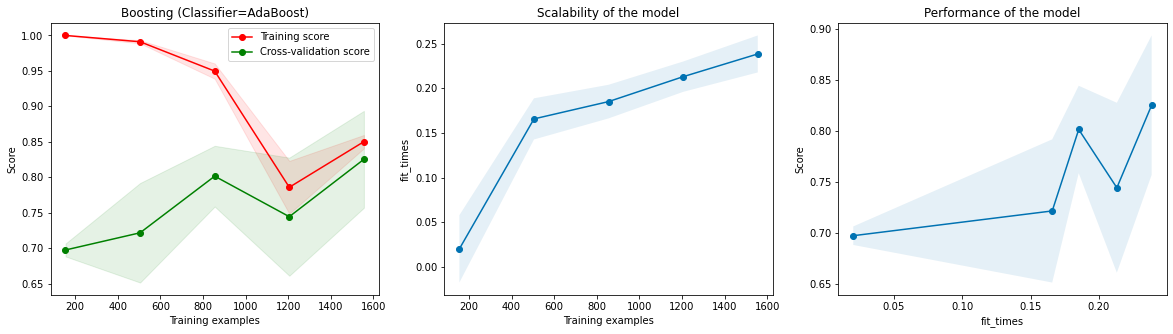

--------------------------------------------------
Classifier =  HistGradientBoosting
F1 Score:  0.9940345446808024
Training Accuracy:  1.0
Testing Accuracy:  0.9942196531791907
Confusion Matrix
[[363   0   0   0]
 [  0 115   0   0]
 [  0   3  18   0]
 [  0   0   0  20]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       363
           1       0.97      1.00      0.99       115
           2       1.00      0.86      0.92        21
           3       1.00      1.00      1.00        20

    accuracy                           0.99       519
   macro avg       0.99      0.96      0.98       519
weighted avg       0.99      0.99      0.99       519

Cross Validation Score
[0.71619863 0.81256512 0.97040101 0.80658138 0.97486964 0.97687861
 0.93341567 0.94985987 0.93696605 0.92462237]


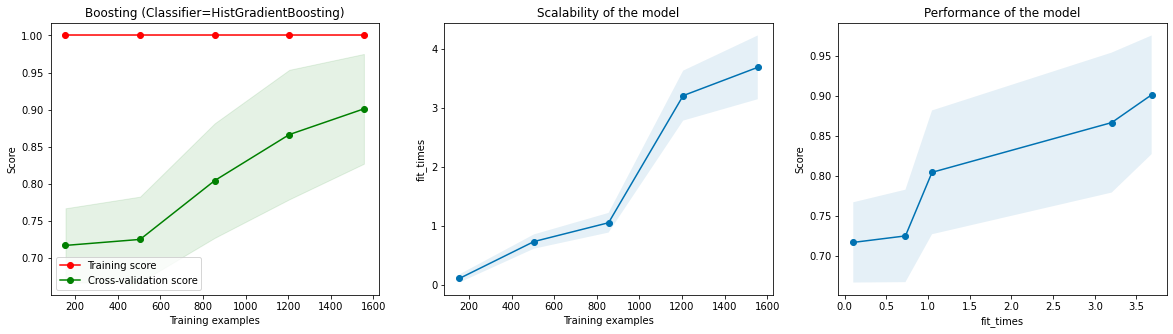

--------------------------------------------------
Classifier =  GradientBoosting
F1 Score:  0.9537931902695076
Training Accuracy:  0.9793217535153019
Testing Accuracy:  0.9556840077071291
Confusion Matrix
[[356   6   1   0]
 [  4 110   1   0]
 [  0   8  11   2]
 [  0   1   0  19]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       363
           1       0.88      0.96      0.92       115
           2       0.85      0.52      0.65        21
           3       0.90      0.95      0.93        20

    accuracy                           0.96       519
   macro avg       0.90      0.85      0.87       519
weighted avg       0.96      0.96      0.95       519

Cross Validation Score
[0.80938195 0.79774442 0.75958553 0.79131586 0.8650538  0.84603604
 0.87796973 0.93411887 0.92269383 0.84907259]


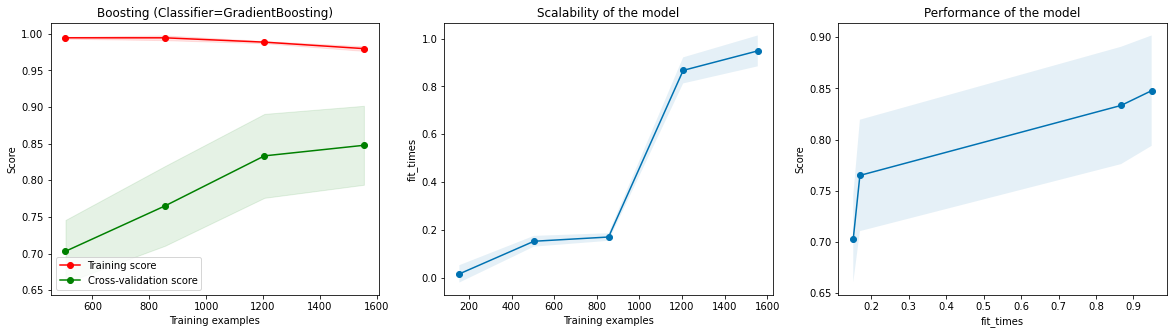

--------------------------------------------------


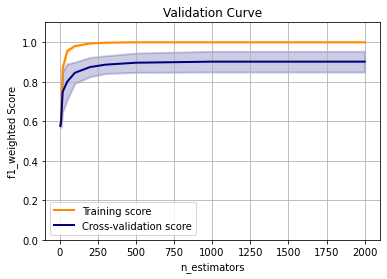

CPU times: user 1min 57s, sys: 2.54 s, total: 2min
Wall time: 2min 40s


In [24]:
%%time
task = "Boosting"
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (AdaBoostClassifier,
                              GradientBoostingClassifier,
                              HistGradientBoostingClassifier)

base_estim = DecisionTreeClassifier(max_depth=1, max_features=0.06)

f1 = []
train_acc = []
test_acc = []
params = ["AdaBoost", "GradientBoosting", "HistGradientBoosting"]

for k, clf in [
    ("AdaBoost", AdaBoostClassifier(base_estimator=base_estim,
                        # n_estimators=100,
                        learning_rate=0.5,
                        random_state=42)),
    ("HistGradientBoosting", HistGradientBoostingClassifier(max_iter=300,
                                      validation_fraction=0.1,
                                      n_iter_no_change=15,
                                      verbose=0,
                                      random_state=42)),
    ("GradientBoosting", GradientBoostingClassifier( # n_estimators=100,
                                 subsample=0.67,
                                 max_features=0.06,
                                 validation_fraction=0.1,
                                 n_iter_no_change=15,
                                 verbose=0,
                                 random_state=42)),
]:
    print("Classifier = ", k)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    result[task][k] = {
        "f1" : f1_score(y_test,y_pred, average='weighted'),
        "training_acc": clf.score(x_train, y_train),
        "testing_acc": clf.score(x_test, y_test),
        "confusion_mat": confusion_matrix(y_test, y_pred),
        "classification_report": classification_report(y_test,y_pred),
        "cross_validation_score": cross_val_score(clf, x, y, cv=10, scoring='f1_weighted'),
    }
    print("F1 Score: ", result[task][k]["f1"])
    print("Training Accuracy: ", result[task][k]["training_acc"])
    print("Testing Accuracy: ", result[task][k]["testing_acc"])
    print("Confusion Matrix")
    print(result[task][k]["confusion_mat"])
    print("Classification Report")
    print(result[task][k]["classification_report"])
    print("Cross Validation Score")
    print(result[task][k]["cross_validation_score"])
    
    # Add to lists
    f1.append(result[task][k]["f1"])
    train_acc.append(result[task][k]["training_acc"])
    test_acc.append(result[task][k]["testing_acc"])

    plot_learning_curve(clf, f"{task} (Classifier={k})", x, y, axes=None, cv=10, n_jobs=4)
    plt.savefig(f'car_plots/learning_curve_{task}_{k}.png')
    plt.show()
    print("--------------------------------------------------")

    
# Validation Curve
n_estimator_list = [5, 10 , 20, 50, 100, 200, 300, 500, 1000, 1500, 2000]
plot_validation_curve(GradientBoostingClassifier(
                                 subsample=0.67,
                                 max_features=0.06,
                                 validation_fraction=0.1,
                                 n_iter_no_change=15,
                                 verbose=0,
                                 random_state=42), f"{task}: GradientBoosting - n_estimators", x, y, "n_estimators", n_estimator_list, scoring="f1_weighted", axes=None, cv=10, n_jobs=4)
plt.savefig(f'car_plots/validation_curve_{task}.png')
plt.show()

# 4 Support Vector Machines

with at least two kernel functions

kernel =  linear
F1 Score:  0.8238468626103184
Training Accuracy:  0.8610421836228288
Testing Accuracy:  0.8323699421965318
Confusion Matrix
[[342  17   3   1]
 [ 46  67   2   0]
 [ 10   2   9   0]
 [  0   5   1  14]]
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       363
           1       0.74      0.58      0.65       115
           2       0.60      0.43      0.50        21
           3       0.93      0.70      0.80        20

    accuracy                           0.83       519
   macro avg       0.78      0.66      0.71       519
weighted avg       0.82      0.83      0.82       519

Cross Validation Score
[0.71523402 0.79214295 0.85419185 0.81657244 0.84430067 0.80718824
 0.90260509 0.88299929 0.8617104  0.63532478]


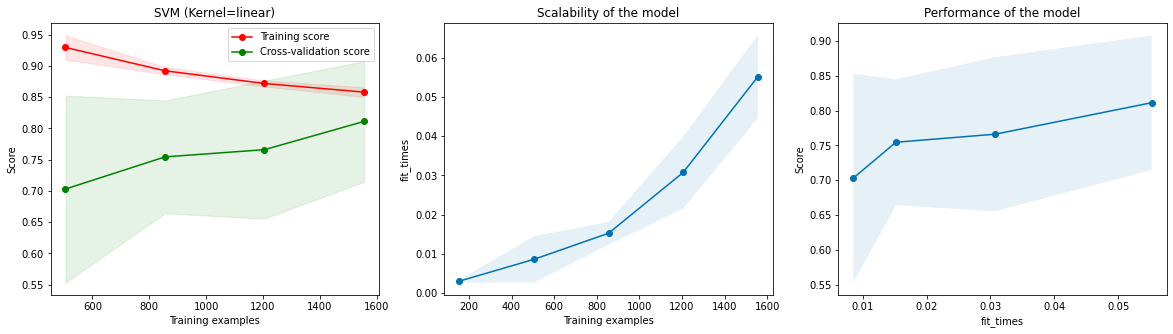

--------------------------------------------------
kernel =  poly
F1 Score:  0.9194990093660518
Training Accuracy:  0.9437551695616212
Testing Accuracy:  0.9210019267822736
Confusion Matrix
[[352  11   0   0]
 [ 18  95   2   0]
 [  0   6  13   2]
 [  0   2   0  18]]
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       363
           1       0.83      0.83      0.83       115
           2       0.87      0.62      0.72        21
           3       0.90      0.90      0.90        20

    accuracy                           0.92       519
   macro avg       0.89      0.83      0.85       519
weighted avg       0.92      0.92      0.92       519

Cross Validation Score
[0.84120387 0.88370493 0.85177479 0.90053591 0.92126226 0.87342455
 0.97077803 0.96550606 0.92132602 0.85280344]


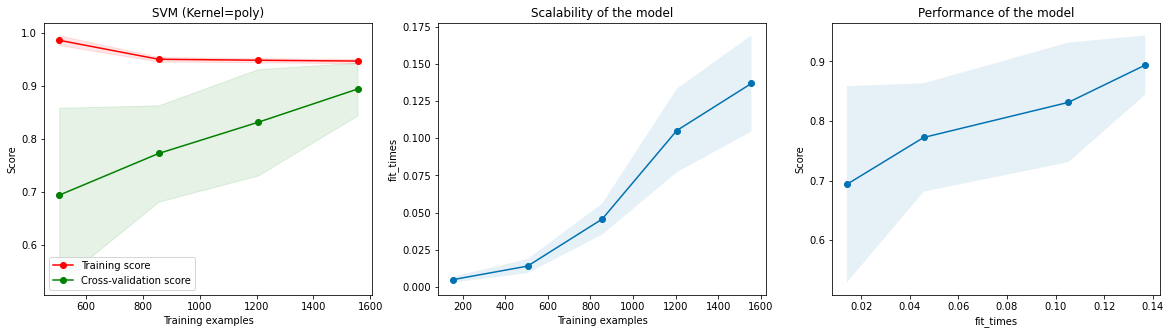

--------------------------------------------------
kernel =  rbf
F1 Score:  0.921735436701008
Training Accuracy:  0.946236559139785
Testing Accuracy:  0.9248554913294798
Confusion Matrix
[[350  13   0   0]
 [  7 107   1   0]
 [  0  11   8   2]
 [  0   5   0  15]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       363
           1       0.79      0.93      0.85       115
           2       0.89      0.38      0.53        21
           3       0.88      0.75      0.81        20

    accuracy                           0.92       519
   macro avg       0.88      0.76      0.79       519
weighted avg       0.93      0.92      0.92       519

Cross Validation Score
[0.81548819 0.87771433 0.85807697 0.87476117 0.87906926 0.85576022
 0.93315606 0.97109827 0.93102549 0.88696739]


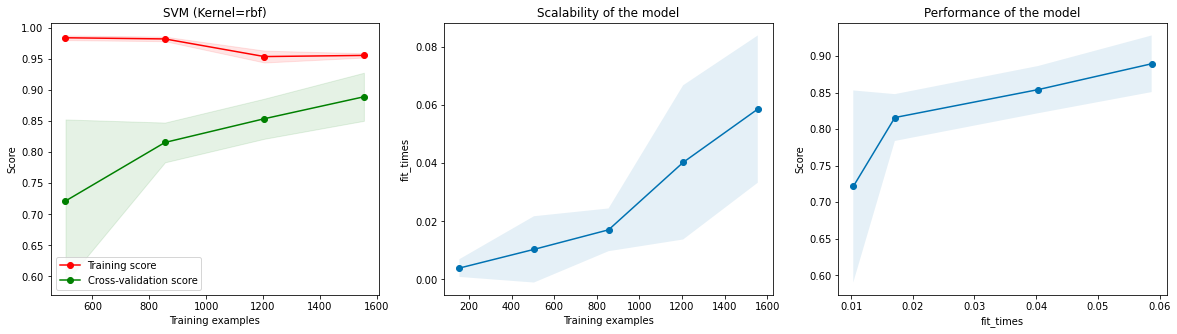

--------------------------------------------------
kernel =  sigmoid
F1 Score:  0.5003290791506897
Training Accuracy:  0.6004962779156328
Testing Accuracy:  0.5568400770712909
Confusion Matrix
[[289  74   0   0]
 [115   0   0   0]
 [ 21   0   0   0]
 [ 20   0   0   0]]
Classification Report
              precision    recall  f1-score   support

           0       0.65      0.80      0.72       363
           1       0.00      0.00      0.00       115
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        20

    accuracy                           0.56       519
   macro avg       0.16      0.20      0.18       519
weighted avg       0.45      0.56      0.50       519

Cross Validation Score
[0.57486737 0.56147369 0.57571468 0.56631398 0.57571468 0.57571468
 0.57571468 0.57571468 0.58103818 0.33113804]


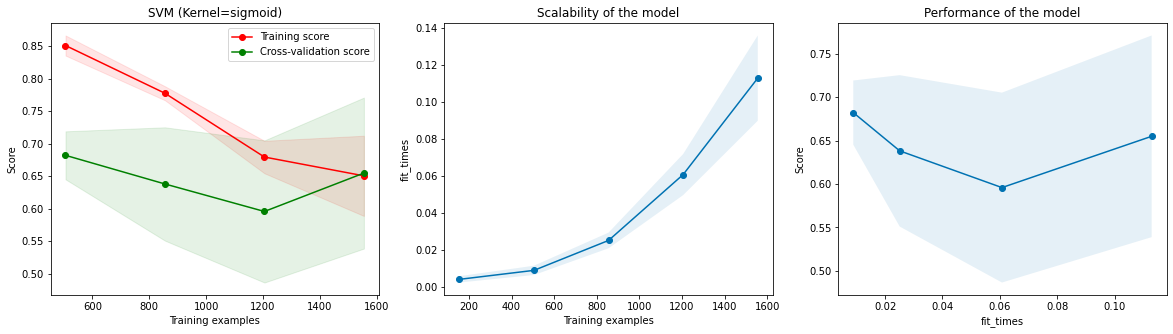

--------------------------------------------------
CPU times: user 4.87 s, sys: 326 ms, total: 5.2 s
Wall time: 8.74 s


In [25]:
%%time
task = "SVM"
from sklearn import svm

for k in ['linear', 'poly', 'rbf', 'sigmoid']:
    print("kernel = ", k)
    clf = svm.SVC(decision_function_shape='ovo', kernel=k)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    result[task][k] = {
        "f1" : f1_score(y_test,y_pred, average='weighted'),
        "training_acc": clf.score(x_train, y_train),
        "testing_acc": clf.score(x_test, y_test),
        "confusion_mat": confusion_matrix(y_test, y_pred),
        "classification_report": classification_report(y_test,y_pred),
        "cross_validation_score": cross_val_score(clf, x, y, cv=10, scoring='f1_weighted'),
    }
    print("F1 Score: ", result[task][k]["f1"])
    print("Training Accuracy: ", result[task][k]["training_acc"])
    print("Testing Accuracy: ", result[task][k]["testing_acc"])
    print("Confusion Matrix")
    print(result[task][k]["confusion_mat"])
    print("Classification Report")
    print(result[task][k]["classification_report"])
    print("Cross Validation Score")
    print(result[task][k]["cross_validation_score"])
    
    # Add to lists
    f1.append(result[task][k]["f1"])
    train_acc.append(result[task][k]["training_acc"])
    test_acc.append(result[task][k]["testing_acc"])

    plot_learning_curve(clf, f"{task} (Kernel={k})", x, y, axes=None, cv=10, n_jobs=4)
    plt.savefig(f'car_plots/learning_curve_{task}_{k}.png')
    plt.show()
    print("--------------------------------------------------")

## Grid Search

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   13.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Parameters:
 {'C': 100, 'gamma': 0.1}
Best Estimators:
 SVC(C=100, gamma=0.1)
Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   21.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   25.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   25.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   23.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   21.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   21.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   31.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   29.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   30.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   33.7s finished


F1 Score:  0.9863600083942065
Training Accuracy:  0.9991728701406121
Testing Accuracy:  0.9865125240847784
Confusion Matrix
[[363   0   0   0]
 [  5 110   0   0]
 [  0   2  19   0]
 [  0   0   0  20]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       363
           1       0.98      0.96      0.97       115
           2       1.00      0.90      0.95        21
           3       1.00      1.00      1.00        20

    accuracy                           0.99       519
   macro avg       0.99      0.97      0.98       519
weighted avg       0.99      0.99      0.99       519

Cross Validation Score
[0.95233135 0.89058477 0.94725493 0.89098217 0.95350215 0.93752312
 0.94957283 0.96456314 0.97093023 0.90875271]
Best Params :  {'C': 100, 'gamma': 0.1}


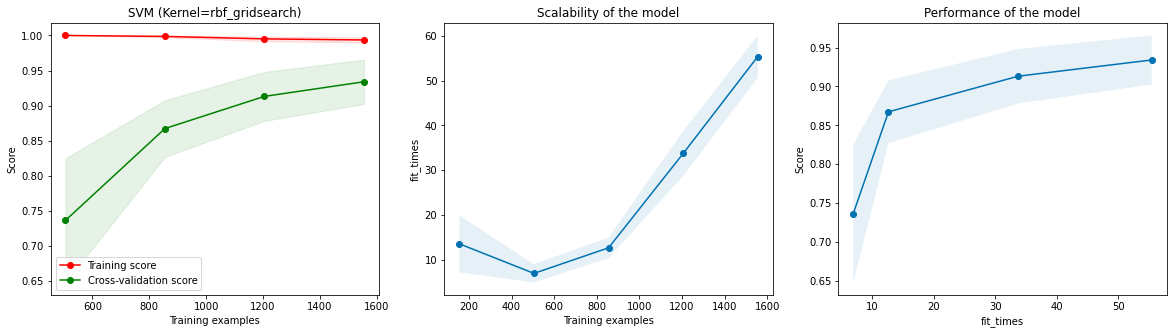

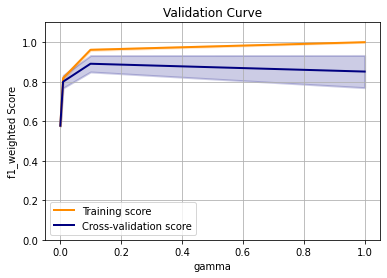

CPU times: user 3min 29s, sys: 2.09 s, total: 3min 31s
Wall time: 10min 16s


In [41]:
%%time
from sklearn.model_selection import GridSearchCV
# Grid Search
task = "SVM"
k = "rbf_gridsearch"
# Parameter Grid
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10]}

# Make grid search classifier
clf_grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, verbose=1, cv=10)

# Train the classifier
clf_grid.fit(x_train, y_train)

y_pred = clf_grid.predict(x_test)
print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)

result[task][k] = {
        "f1" : f1_score(y_test,y_pred, average='weighted'),
        "training_acc": clf_grid.score(x_train, y_train),
        "testing_acc": clf_grid.score(x_test, y_test),
        "confusion_mat": confusion_matrix(y_test, y_pred),
        "classification_report": classification_report(y_test,y_pred),
        "cross_validation_score": cross_val_score(clf_grid, x, y, cv=10, scoring='f1_weighted'),
        "best_parameters": clf_grid.best_params_,
        "best_estimators": clf_grid.best_estimator_
    }

print("F1 Score: ", result[task][k]["f1"])
print("Training Accuracy: ", result[task][k]["training_acc"])
print("Testing Accuracy: ", result[task][k]["testing_acc"])
print("Confusion Matrix")
print(result[task][k]["confusion_mat"])
print("Classification Report")
print(result[task][k]["classification_report"])
print("Cross Validation Score")
print(result[task][k]["cross_validation_score"])
print("Best Params : ", result[task][k]["best_parameters"])
    
# Add to lists
f1.append(result[task][k]["f1"])
train_acc.append(result[task][k]["training_acc"])
test_acc.append(result[task][k]["testing_acc"])

plot_learning_curve(clf_grid, f"{task} (Kernel={k})", x, y, axes=None, cv=10, n_jobs=4)
plt.savefig(f'car_plots/learning_curve_{task}_{k}.png')
plt.show()

# Validation Curve
param_range = np.logspace(-3, 0, 4)
plot_validation_curve(svm.SVC(kernel='rbf'), 
                      f"{task}: RBF - gamma, max_iter", x, y, "gamma", param_range, scoring="f1_weighted", axes=None, cv=10, n_jobs=4)
plt.savefig(f'car_plots/validation_curve_{task}.png')
plt.show()

# 5 K-Nearest Neighbors

with different values of k

K =  1
F1 Score:  0.8342409522376961
Training Accuracy:  1.0
Testing Accuracy:  0.8342967244701349
Confusion Matrix
[[336  25   2   0]
 [ 27  74   6   8]
 [  3   2  12   4]
 [  0   6   3  11]]
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       363
           1       0.69      0.64      0.67       115
           2       0.52      0.57      0.55        21
           3       0.48      0.55      0.51        20

    accuracy                           0.83       519
   macro avg       0.65      0.67      0.66       519
weighted avg       0.83      0.83      0.83       519

Cross Validation Score
[0.9165663  0.76349042 0.81213811 0.70911383 0.83265092 0.7647015
 0.82487892 0.87687762 0.89769088 0.8039944 ]


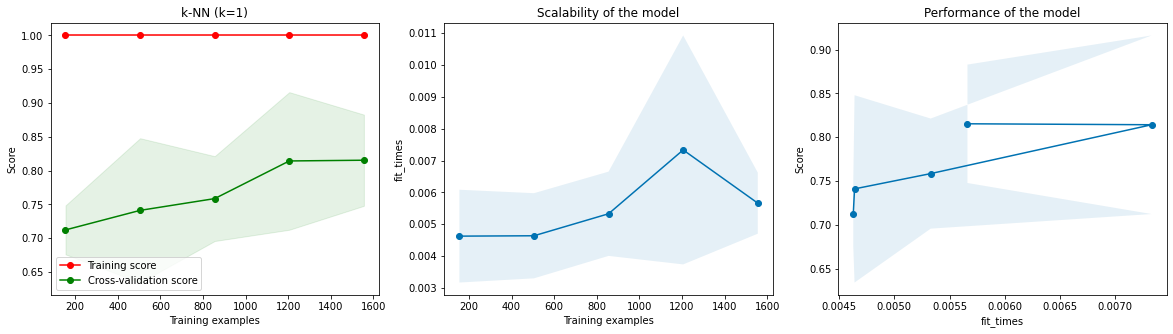

--------------------------------------------------
K =  3
F1 Score:  0.8895606927740799
Training Accuracy:  0.9669148056244831
Testing Accuracy:  0.8959537572254336
Confusion Matrix
[[353   9   1   0]
 [ 21  91   2   1]
 [  5   9   6   1]
 [  0   3   2  15]]
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       363
           1       0.81      0.79      0.80       115
           2       0.55      0.29      0.37        21
           3       0.88      0.75      0.81        20

    accuracy                           0.90       519
   macro avg       0.79      0.70      0.73       519
weighted avg       0.89      0.90      0.89       519

Cross Validation Score
[0.87429068 0.70499286 0.68630523 0.67517227 0.82880953 0.75485018
 0.8304238  0.8722582  0.9091135  0.77306647]


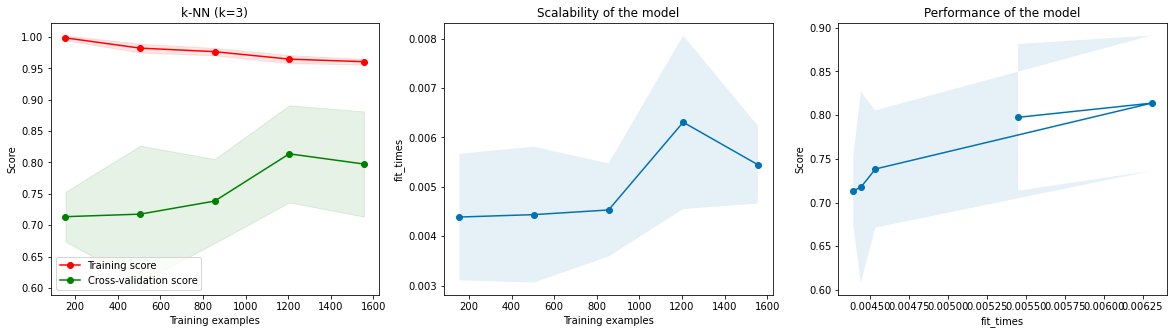

--------------------------------------------------
K =  5
F1 Score:  0.9349326069234694
Training Accuracy:  0.9727047146401985
Testing Accuracy:  0.9383429672447013
Confusion Matrix
[[357   6   0   0]
 [  8 106   1   0]
 [  1  11   9   0]
 [  0   4   1  15]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       363
           1       0.83      0.92      0.88       115
           2       0.82      0.43      0.56        21
           3       1.00      0.75      0.86        20

    accuracy                           0.94       519
   macro avg       0.91      0.77      0.82       519
weighted avg       0.94      0.94      0.93       519

Cross Validation Score
[0.82819353 0.75740166 0.77487333 0.75702799 0.82488134 0.81124161
 0.88206344 0.92290229 0.91984154 0.83714751]


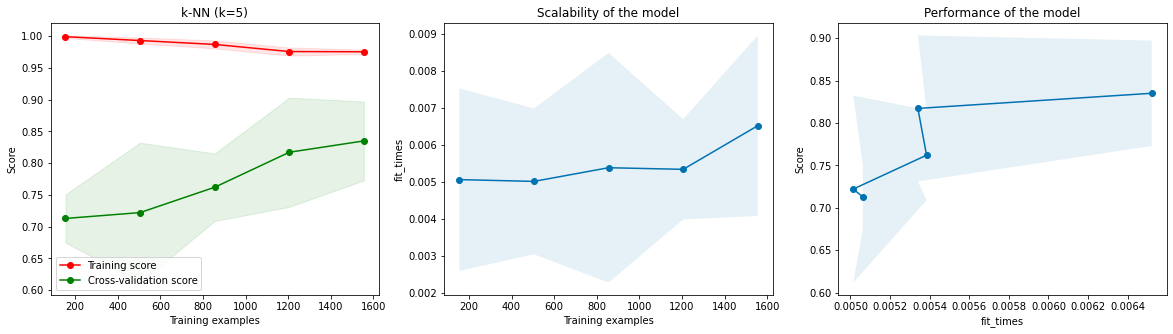

--------------------------------------------------
K =  7
F1 Score:  0.9257158691687809
Training Accuracy:  0.9685690653432589
Testing Accuracy:  0.928709055876686
Confusion Matrix
[[358   5   0   0]
 [ 10 102   3   0]
 [  0   9  11   1]
 [  0   6   3  11]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       363
           1       0.84      0.89      0.86       115
           2       0.65      0.52      0.58        21
           3       0.92      0.55      0.69        20

    accuracy                           0.93       519
   macro avg       0.84      0.74      0.78       519
weighted avg       0.93      0.93      0.93       519

Cross Validation Score
[0.80609048 0.75680307 0.74260792 0.76355208 0.87027064 0.83765546
 0.8779083  0.92518952 0.94041816 0.85642012]


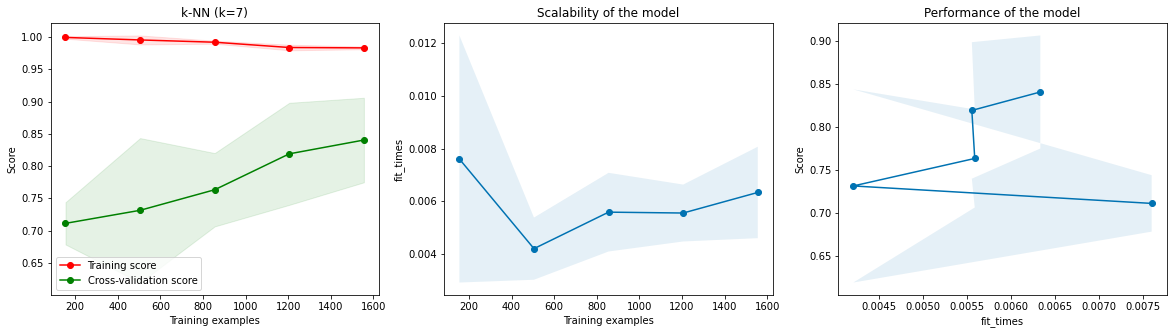

--------------------------------------------------
K =  9
F1 Score:  0.9130400924521912
Training Accuracy:  0.9594706368899917
Testing Accuracy:  0.9152215799614644
Confusion Matrix
[[354   9   0   0]
 [ 12  99   4   0]
 [  0  11  10   0]
 [  0   5   3  12]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       363
           1       0.80      0.86      0.83       115
           2       0.59      0.48      0.53        21
           3       1.00      0.60      0.75        20

    accuracy                           0.92       519
   macro avg       0.84      0.73      0.77       519
weighted avg       0.92      0.92      0.91       519

Cross Validation Score
[0.82591515 0.78023411 0.75102348 0.77761401 0.82842283 0.80781504
 0.86266509 0.91147465 0.91782539 0.87249539]


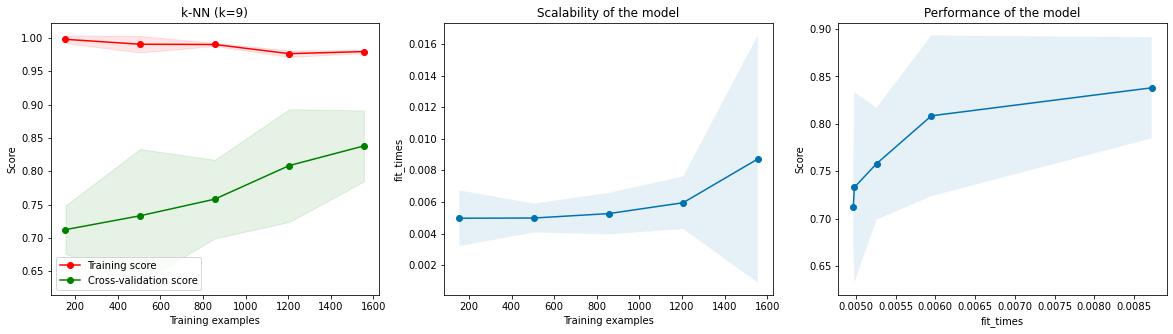

--------------------------------------------------


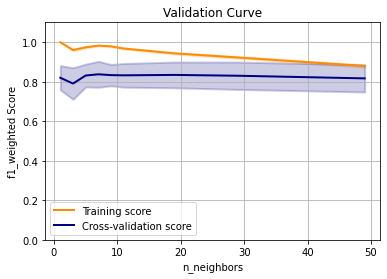

CPU times: user 5.25 s, sys: 457 ms, total: 5.71 s
Wall time: 15.3 s


In [31]:
%%time
task = "k-NN"

from sklearn.neighbors import KNeighborsClassifier

f1 = []
train_acc = []
test_acc = []
params = [1, 3, 5, 7, 9]

for k in params:
    print("K = ", k)
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    result[task][k] = {
        "f1" : f1_score(y_test,y_pred, average='weighted'),
        "training_acc": clf.score(x_train, y_train),
        "testing_acc": clf.score(x_test, y_test),
        "confusion_mat": confusion_matrix(y_test, y_pred),
        "classification_report": classification_report(y_test,y_pred),
        "cross_validation_score": cross_val_score(clf, x, y, cv=10, scoring='f1_weighted'),
    }
    print("F1 Score: ", result[task][k]["f1"])
    print("Training Accuracy: ", result[task][k]["training_acc"])
    print("Testing Accuracy: ", result[task][k]["testing_acc"])
    print("Confusion Matrix")
    print(result[task][k]["confusion_mat"])
    print("Classification Report")
    print(result[task][k]["classification_report"])
    print("Cross Validation Score")
    print(result[task][k]["cross_validation_score"])

    # Add to lists
    f1.append(result[task][k]["f1"])
    train_acc.append(result[task][k]["training_acc"])
    test_acc.append(result[task][k]["testing_acc"])
    
    plot_learning_curve(clf, f"{task} (k={k})", x, y, axes=None, cv=10, n_jobs=4)
    plt.savefig(f'car_plots/learning_curve_{task}_{k}.png')
    plt.show()
    print("--------------------------------------------------")
    
# Validation Curve
new_params = params + [11, 19, 29, 49]
plot_validation_curve(KNeighborsClassifier(), f"{task}: n_neighbors", x, y, "n_neighbors", new_params, scoring="f1_weighted", axes=None, cv=10, n_jobs=4)
plt.savefig(f'car_plots/validation_curve_{task}.png')
plt.show()

--------------------------------------------------

In [35]:
result

{'Decision_Tree': {1: {'f1': 0.5757146789351578,
   'training_acc': 0.7005789909015715,
   'testing_acc': 0.6994219653179191,
   'confusion_mat': array([[363,   0,   0,   0],
          [115,   0,   0,   0],
          [ 21,   0,   0,   0],
          [ 20,   0,   0,   0]]),
   'classification_report': '              precision    recall  f1-score   support\n\n           0       0.70      1.00      0.82       363\n           1       0.00      0.00      0.00       115\n           2       0.00      0.00      0.00        21\n           3       0.00      0.00      0.00        20\n\n    accuracy                           0.70       519\n   macro avg       0.17      0.25      0.21       519\nweighted avg       0.49      0.70      0.58       519\n',
   'cross_validation_score': array([0.57571468, 0.57571468, 0.57571468, 0.57571468, 0.57571468,
          0.57571468, 0.57571468, 0.57571468, 0.58103818, 0.58103818]),
   'tree_rules': '|--- safety <= 1.50\n|   |--- class: 0\n|--- safety >  1.50\n|   

In [47]:
# Save Output
import json

def key_to_json(data):
    if data is None or isinstance(data, (bool, int, float, str)):
        return data
    if isinstance(data, (tuple, frozenset)):
        return str(data)
    raise TypeError('Unknown type[key_to_json]:', type(data))

def to_json(data):
    if data is None or isinstance(data, (bool, int, float, tuple, range, str, list)):
        return data
    if isinstance(data, np.ndarray):
        return data.tolist()
    if isinstance(data, np.float64):
        return data.tolist()
    if isinstance(data, svm._classes.SVC):
        return 'sklearn.svm._classes.SVC'
    if isinstance(data, (set, frozenset)):
        return sorted(data)
    
    if isinstance(data, dict):
        return {key_to_json(key): to_json(data[key]) for key in data}
    raise TypeError('Unknown type[to_json]:', type(data))

def default(obj):
    if type(obj).__module__ == np.__name__:
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return obj.item()
    raise TypeError('Unknown type:', type(obj))

json.dump(to_json(result), open("car_evaluation_result.json", "w"), default=default)